# HOUSE ANALYSIS GIOVALDIRCH

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from feature_engine.outlier_removers import Winsorizer

%matplotlib inline

In [2]:
house_org = pd.read_csv('./Desktop/house.csv') #menyimpan dataset original

In [3]:
house = pd.read_csv('./Desktop/house.csv') 
house.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [12]:
house.shape 

(4600, 18)

In [13]:
house.dtypes

date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
country           object
dtype: object

In [14]:
house.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [15]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [16]:
house.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [17]:
# house['date'] = pd.to_datetime(house['date']) #membuat tahun bulan pada kolom baru
# house['year']= house['date'].dt.year
# house['month'] = house['date'].dt.month
# house['day']=house['date'].dt.day

## ABOUT THE DATA

In [18]:
print('Data ini memiliki harga terkecil {} dan harga terbesar {}.'.format(house['price'].min(),house['price'].max()))

Data ini memiliki harga terkecil 0.0 dan harga terbesar 26590000.0.


In [19]:
print('Data ini berawal dari bulan ke {} sampai ke {}.'.format(house['month'].min(),house['month'].max()))

Data ini berawal dari bulan ke 5 sampai ke 7.


In [20]:
print('Data ini berisi data rumah berdasarkan {} kota di USA.'.format(house['city'].nunique()))

Data ini berisi data rumah berdasarkan 44 kota di USA.


In [21]:
print('Data ini berisi data jumlah kamar mandi antara {} dan {}.'.format(house['bathrooms'].min(),house['bathrooms'].max()))

Data ini berisi data jumlah kamar mandi antara 0.0 dan 8.0.


In [22]:
print('Data ini berisi antara jumlah kamar tidur antara {} dan {}.'.format(house['bedrooms'].min(),house['bedrooms'].max()))

Data ini berisi antara jumlah kamar tidur antara 0.0 dan 9.0.


In [23]:
print('Data ini berisi jumlah lantai antara {} dan {}.'.format(house['floors'].min(),house['floors'].max()))

Data ini berisi jumlah lantai antara 1.0 dan 3.5.


In [24]:
print('Data ini berdasarkan data selama {} bulan.'.format(house['month'].nunique()))

Data ini berdasarkan data selama 3 bulan.


In [25]:
print('Data ini berisi data luas bangunan terkecil {}m2 dan terbesar {}m2.'.format(house['sqft_living'].min(),house['sqft_living'].max()))

Data ini berisi data luas bangunan terkecil 370m2 dan terbesar 13540m2.


In [26]:
print('Data ini berisi data luas tanah terkecil {}m2 dan terbesar {}m2.'.format(house['sqft_lot'].min(),house['sqft_lot'].max()))

Data ini berisi data luas tanah terkecil 638m2 dan terbesar 1074218m2.


In [27]:
print('Data ini berisi data luas basement terkecil {}m2 dan terbesar {}m2.'.format(house['sqft_basement'].min(),house['sqft_basement'].max()))

Data ini berisi data luas basement terkecil 0m2 dan terbesar 4820m2.


In [175]:
print('Data ini berisi data total penjualan untuk setiap bulannya, yaitu Mei dengan {} penjualan, Juni dengan {} penjualan, dan Juli dengan {} penjualan'.format(house5['month'].count(),house6['month'].count(),house7['month'].count()))

Data ini berisi data total penjualan untuk setiap bulannya, yaitu Mei dengan 1748 penjualan, Juni dengan 2153 penjualan, dan Juli dengan 648 penjualan


##   Dataset ini merupakan dataset penjualan rumah di USA. Data ini berawal dari bulan 5 sampai ke 7. Data ini berisi data rumah berdasarkan 44 kota di USA. Data ini berisi data dengan minimal 0 kamar mandi dan maksimal 8 kamar mandi. Data ini berisi data dengan jumlah minimal 0 dan 9 maksimal kamar tidur. Data ini berisi data antara 1 sampai 3.5 jumlah lantai. Data ini berisi data luas bangunan terkecil 370m2 dan terbesar 13540m2. Data ini berisi data luas tanah terkecil 638m2 dan terbesar 1074218m2. Data ini berisi data total penjualan untuk setiap bulannya, yaitu Mei dengan 1768, Juni dengan 2179 dan Juli(hanya sampai tgl 10) dengan 653. Berdasarkan data tersebut, ditemukan kejanggalan pada harga,jumlah kamar mandi dan kamar tidur yang bernilai 0. Sehingga akan ditelaah lebih lanjut nantinya.

sqftabove = sqftliving - sqft_basement jd bisa diwakilkan sqftliving

In [29]:
house.corr()['price'].sort_values(ascending=False).round(3)

price            1.000
sqft_living      0.430
sqft_above       0.368
bathrooms        0.327
view             0.229
sqft_basement    0.210
bedrooms         0.200
floors           0.151
waterfront       0.136
sqft_lot         0.050
month            0.041
condition        0.035
yr_built         0.022
day             -0.022
yr_renovated    -0.029
year               NaN
Name: price, dtype: float64

Berdasarkan korelasi dataset house terhadap kolom target(sebelum dilakukan handling missing value,fillna dll), ditemukan korelasi positif terletak pada sqft_living,sqft_above,bathrooms. dan korelasi negatif terletak di yr_renovated,day

# Definisikan Masalah yang akan anda temukan yang berkaitan dengan dataset yang anda pilih


Dataset ini berisi data penjualan rumah di USA untuk tiga bulan dari Mei hingga 10 Juli. Masalah yang ditemukan berdasarkan harga rumah ini adalah 

- perusahaan ingin mencari area kota ter profit untuk berbisnis properti yang mana penjualan tersebut diurutkan berdasarkan 10 kota terbaik dalam hal penjualan di 3 bulan.

- perusahaan ingin mencari spesifikasi properti yang profit untuk berbisnis di USA dilihat dari data historis bulan Mei ke 10 Juli. Hal ini bertujuan untuk mendapatkan profit berdasarkan analisa 10 kota terbaik


# Tujuan Exploratory Data Analysis

- mencari 10 kota teratas teruntung dalam penjualan dan mengidentifikasi pengaruh lokasi terhadap penjualan

- membuat rekomendasi untuk spesifikasi terbaik untuk seorang developer yang ingin mendapatkan profit dari bisnis properti berdasarkan faktor-faktor tersebut.

# Handling Missing Values

In [30]:
house.isna().values.any() #mencari missing values

False

In [31]:
house.isna().sum()/len(house)*100  #persentase missing values

date             0.0
price            0.0
bedrooms         0.0
bathrooms        0.0
sqft_living      0.0
sqft_lot         0.0
floors           0.0
waterfront       0.0
view             0.0
condition        0.0
sqft_above       0.0
sqft_basement    0.0
yr_built         0.0
yr_renovated     0.0
street           0.0
city             0.0
statezip         0.0
country          0.0
year             0.0
month            0.0
day              0.0
dtype: float64

### tidak terdapat missing values di Dataset House

In [32]:
house.duplicated().value_counts() #mencari duplikasi data

False    4600
dtype: int64

In [33]:
house[house.duplicated(keep=False)] #menampilkan duplikasi data jika ada

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,year,month,day


In [34]:
house.describe(include=['O']).T #menampilkan deskripsi data categorical

,count,unique,top,freq
street,4600,4525,2520 Mulberry Walk NE,4
city,4600,44,Seattle,1573
statezip,4600,77,WA 98103,148
country,4600,1,USA,4600


In [35]:
pd.DataFrame(house['price'].describe()) #menampilkan deskripsi price sebagai kolom target

,price
count,4.600000e+03
mean,5.519630e+05
std,5.638347e+05
min,0.000000e+00
25%,3.228750e+05
50%,4.609435e+05
75%,6.549625e+05
max,2.659000e+07


In [36]:
# house.drop(house[house['price'] == 0].index, inplace = True)

In [37]:
# house.drop(house[house['bedrooms'] == 0].index, inplace = True)

In [38]:
# house.drop(house[house['bathrooms'] == 0].index, inplace = True)

In [39]:
# house = house.drop(["yr_built","yr_renovated"],axis=1) #mendrop yr_built dan yr_renovated dikarenakan memiliki korelasi negatif,kecil dan dapat diwakilkan dengan month dan day

In [40]:
# house['country'].unique() #mencari unique di country

array(['USA'], dtype=object)

In [41]:
# house = house.drop(['country'],axis=1) #melakukan drop karena semua data berasal dari USA

In [42]:
# house = house.drop(["street","statezip"],axis=1) #melakukan drop karena jalan,kode pos sudah diwakilkan dengan city

In [43]:
# house['year'].unique() #menampilkan unique di year

array([2014])

In [44]:
# house = house.drop(['year'],axis=1)

In [45]:
house['city'].unique()

array(['Shoreline', 'Seattle', 'Kent', 'Bellevue', 'Redmond',
       'Maple Valley', 'North Bend', 'Lake Forest Park', 'Sammamish',
       'Auburn', 'Des Moines', 'Bothell', 'Federal Way', 'Kirkland',
       'Issaquah', 'Woodinville', 'Normandy Park', 'Fall City', 'Renton',
       'Carnation', 'Snoqualmie', 'Duvall', 'Burien', 'Covington',
       'Inglewood-Finn Hill', 'Kenmore', 'Newcastle', 'Mercer Island',
       'Black Diamond', 'Ravensdale', 'Clyde Hill', 'Algona', 'Skykomish',
       'Tukwila', 'Vashon', 'Yarrow Point', 'SeaTac', 'Medina',
       'Enumclaw', 'Snoqualmie Pass', 'Pacific', 'Beaux Arts Village',
       'Preston', 'Milton'], dtype=object)

In [46]:
house['month'].unique()

array([5, 6, 7])

In [47]:
house['waterfront'].unique() #menampilkan unique di waterfront

array([0, 1])

In [48]:
house.waterfront.value_counts() #menampilkan jumlah total per unique dari waterfront

0    4519
1      30
Name: waterfront, dtype: int64

In [49]:
house['view'].unique() #menampilkan unique di view

array([0, 4, 1, 2, 3])

In [50]:
house['floors'].unique()

array([1.5, 2. , 1. , 2.5, 3. , 3.5])

In [51]:
house['bedrooms'].unique()

array([3., 5., 4., 2., 6., 7., 9., 1., 8.])

In [52]:
house['bathrooms'].unique()

array([1.5 , 2.5 , 2.  , 2.25, 1.  , 1.75, 2.75, 3.  , 3.25, 3.5 , 8.  ,
       4.25, 4.  , 3.75, 5.  , 4.5 , 5.75, 1.25, 6.5 , 4.75, 0.75, 5.25,
       5.5 , 6.25, 6.75])

In [53]:
house.head(1) #menampilkan satu data house

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,city,month,day
0,2014-05-02,313000.0,3.0,1.5,1340,7912,1.5,0,0,3,1340,0,Shoreline,5,2


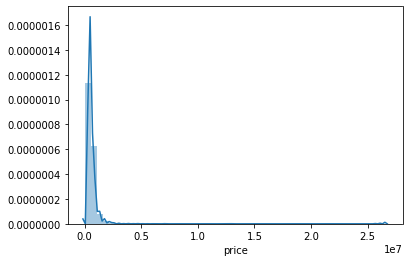

In [4]:
sns.distplot(house['price']) #menggunakan displot terhadap price untuk mengidentifikasi serta menentukan jenis heatmap yang digunakan

In [6]:
windsoriser = Winsorizer(distribution='skewed',
                         tail='both',
                         fold=1.5,
                         variables=['price'])

windsoriser.fit(house)

Winsorizer(distribution='skewed', fold=1.5, tail='both', variables=['price'])

In [7]:
house = windsoriser.transform(house)

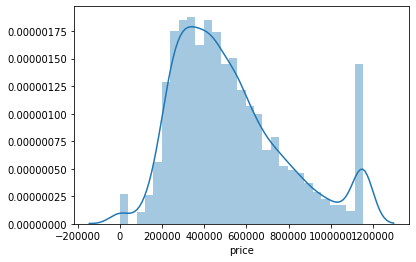

In [8]:
sns.distplot(house['price'])

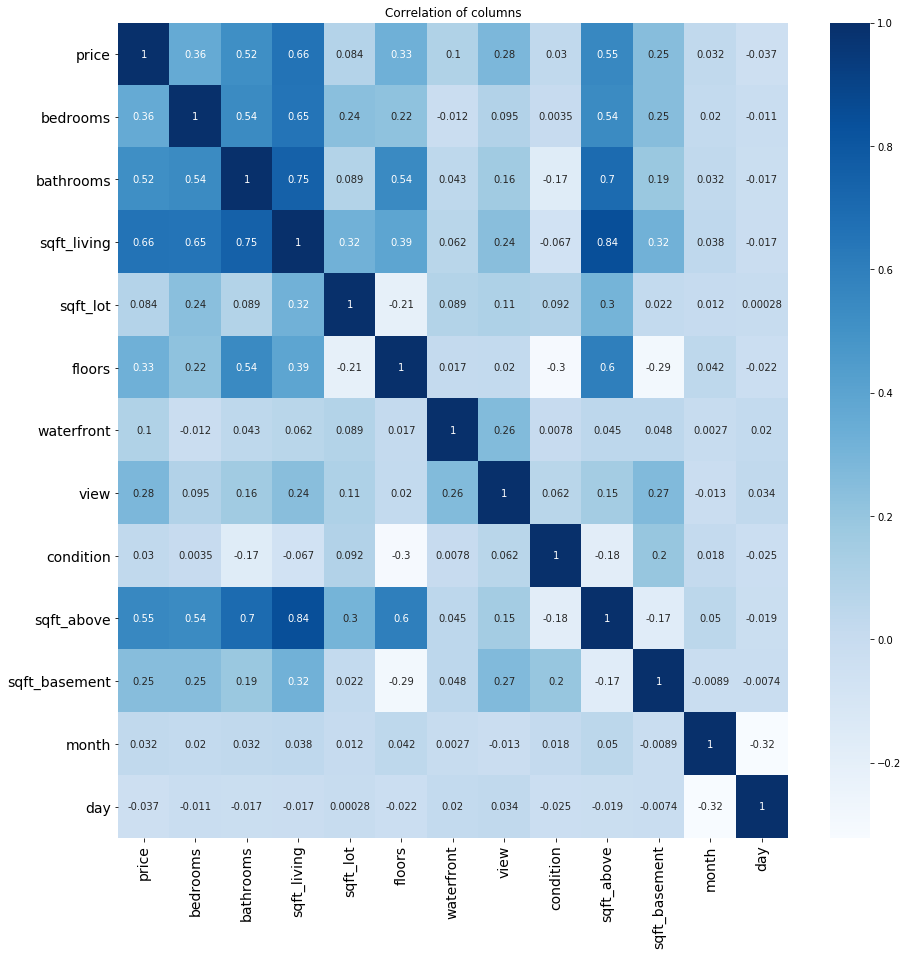

<Figure size 432x288 with 0 Axes>

In [55]:
sns.heatmap(house.corr('spearman'), cmap='Blues',annot=True).set_title("Correlation of columns")# mengidentifikasi korelasi antar kolom untuk data house
fig=plt.gcf()
fig.set_size_inches(15,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()
plt.savefig('Korelasi House USA.png')

sqft_living, sqft_above, bathrooms, bedrooms merupakan top korelasi positif

# Mencari 10 kota teratas teruntung dalam penjualan yang mengalami kenaikkan dan mengidentifikasi pengaruh lokasi di USA.

## TOP CITY USA

In [56]:
house['city'].nunique()

44

In [57]:
house['month'].value_counts()

6    2153
5    1748
7     648
Name: month, dtype: int64

In [58]:
house['month'].count()

4549

In [59]:
house.pivot_table(index='city', values='price', aggfunc=['sum', 'min', 'max', 'median', 'mean']).head(50)

,sum,min,max,median,mean
,price,price,price,price,price
city,,,,,
Algona,1.036440e+06,100000.000000,262000.0,2.300000e+05,2.072880e+05
Auburn,5.268392e+07,87500.000000,900000.0,2.760000e+05,3.010510e+05
Beaux Arts Village,7.450000e+05,745000.000000,745000.0,7.450000e+05,7.450000e+05
Bellevue,2.422937e+08,248000.000000,7062500.0,7.250000e+05,8.622551e+05
Black Diamond,3.056450e+06,224000.000000,650000.0,3.265000e+05,3.820562e+05
Bothell,1.588758e+07,347000.000000,749995.0,4.580000e+05,4.814419e+05
Burien,2.582210e+07,100000.000000,1035000.0,2.874750e+05,3.586402e+05
Carnation,1.119254e+07,80000.000000,1680000.0,4.321750e+05,5.087520e+05


In [60]:
top_city=house.city.value_counts().head(10)
top_city

Seattle        1560
Renton          291
Bellevue        281
Redmond         234
Kirkland        187
Issaquah        186
Kent            184
Auburn          175
Sammamish       171
Federal Way     145
Name: city, dtype: int64

In [61]:
house.pivot_table(index='city', values='month', aggfunc=['count'])

,count
,month
city,
Algona,5
Auburn,175
Beaux Arts Village,1
Bellevue,281
Black Diamond,8
Bothell,33
Burien,72
Carnation,22


Berdasarkan data diatas, dapat dilihat bahwa penjualan tidak merata di seluruh kota di USA. Penjualan per 3 bulan paling banyak terletak di Seattle dengan total 1573. dan Tersedikit terletak di Snoqualmie Pass,Inglewood-Finn Hill, dan Beaux Arts Village yang ketiganya berjumlah total 1 penjualan. Berdasarkan data ini, kita dapat mendapatkan top city untuk ditelaah berdasarkan bulan dan hari nantinya.

[Text(0, 0, 'Seattle'),
 Text(0, 0, 'Renton'),
 Text(0, 0, 'Bellevue'),
 Text(0, 0, 'Redmond'),
 Text(0, 0, 'Kirkland'),
 Text(0, 0, 'Issaquah'),
 Text(0, 0, 'Kent'),
 Text(0, 0, 'Auburn'),
 Text(0, 0, 'Sammamish'),
 Text(0, 0, 'Federal Way')]

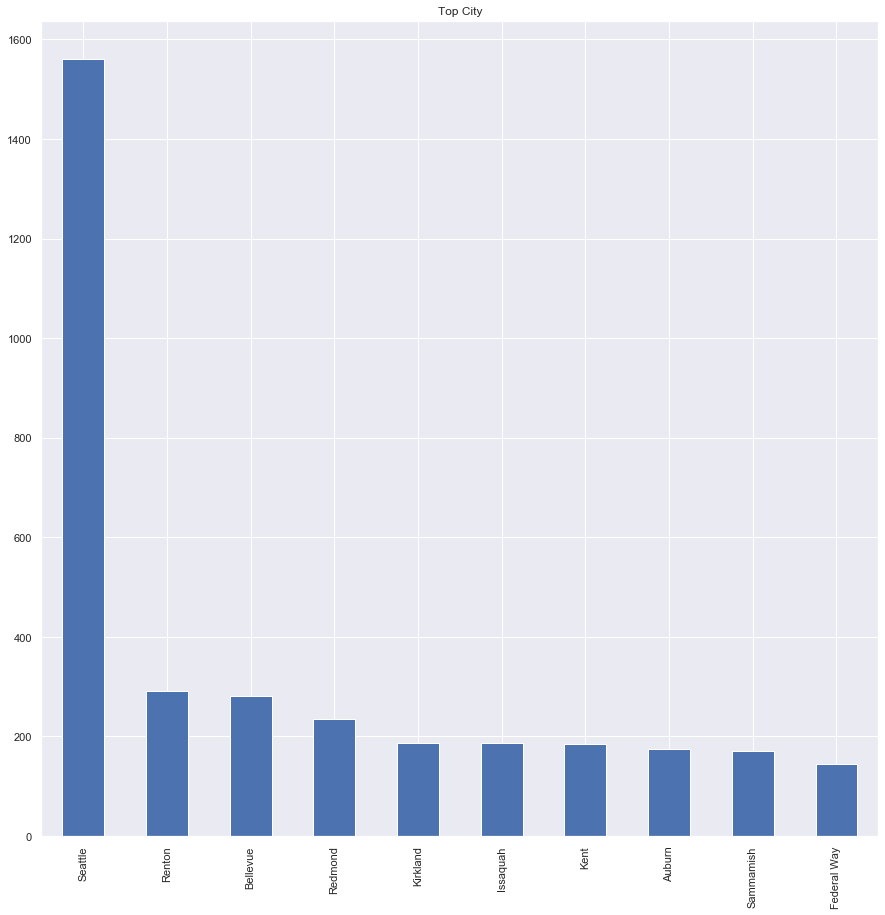

In [62]:
sns.set(rc={'figure.figsize':(15,15)})
viz_1=top_city.plot(kind='bar')
viz_1.set_title('Top City')
viz_1.set_xticklabels(viz_1.get_xticklabels(), rotation=90)

## Berdasarkan data diatas, Seattle merupakan top city di USA untuk penjualan tiga bulan rumah dengan total 1573 penjualan pada kurun waktu Mei hingga Juli 10, diikuti Renton dan Bellevue di total 293 dan 235. 

Text(0.5, 1.0, 'Percentage City')

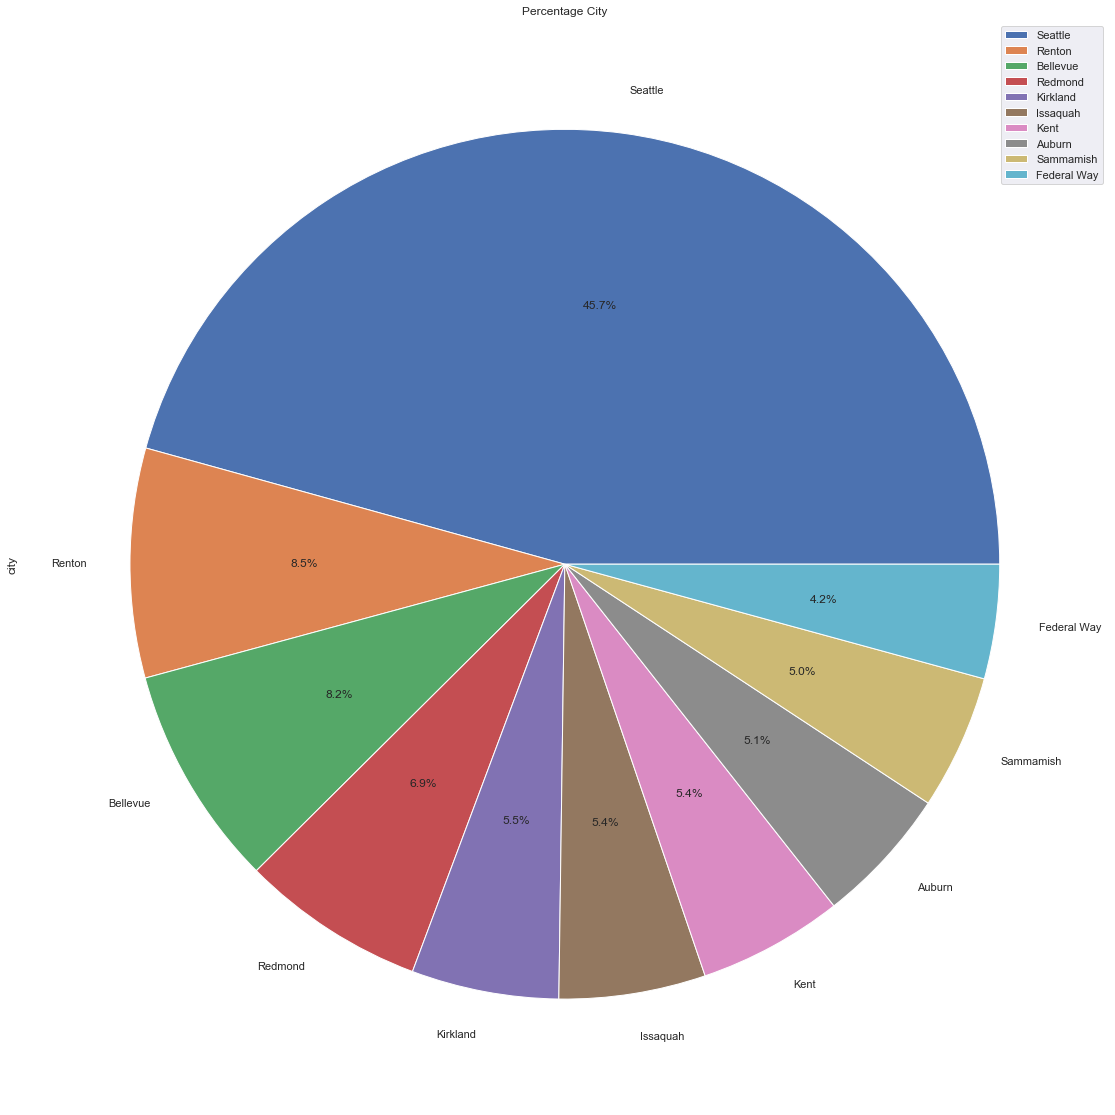

In [63]:
sns.set(rc={'figure.figsize':(20,20)})
viz_1=top_city.plot(kind='pie',autopct='%1.1f%%',legend=True)
viz_1.set_title('Percentage City')

## Persentase penjualan di top 10 city berdasarkan tiga bulan, Seattle memimpin dengan 45.7 % dan terkecil adalah Federal Way dengan 4.3%.

## TOP CITY / MONTH

# MONTH 5 ( TOP CITY )
- jumlah transaksi yang terjadi di bulan 5
- rata-rata penjualan di bulan 5
- top 10 di bulan 5
- visualisasi penjualan top 10 di bulan 5
- rincian spesifikasi penjualan perhari untuk per city di bulan 5
- visualisasi penjualan per harinya di top 10 di bulan 5
- kesimpulan bulan 5

In [64]:
house5 = house[house.month == 5]

In [65]:
# DATA PENJUALAN DI BULAN 5 PER CITY SE USA

In [66]:
house5.pivot_table(index='city', values='price', aggfunc=['sum', 'max', 'median', 'mean']).head(50)

,sum,max,median,mean
,price,price,price,price
city,,,,
Algona,1.036440e+06,262000.0,230000.000,2.072880e+05
Auburn,1.837398e+07,900000.0,280000.000,3.062331e+05
Beaux Arts Village,7.450000e+05,745000.0,745000.000,7.450000e+05
Bellevue,7.915591e+07,2150000.0,670000.000,7.611145e+05
Black Diamond,8.859500e+05,398000.0,253000.000,2.953167e+05
Bothell,3.872000e+06,612500.0,464000.000,4.840000e+05
Burien,7.343620e+06,988500.0,255000.000,3.496962e+05
Carnation,5.088850e+06,1680000.0,363925.000,5.088850e+05


Berdasarkan data diatas kita dapat melihat bahwa penjualan terbanyak terletak pada kota Seattle dengan jumlah 3.503741e+08 yang menegaskan bahwa kota ini sudah memimpin untuk menjadi area terprofit sejak bulan pertama dan harga maksimumnya adalah 3200000.0, sedangkan area tertidak profit berada di Skykomish dengan total penjualan 1.340000e+05 di bulan ke 5 dengan harga maksimum 134000.0.

### JUMLAH TRANSAKSI YANG TERJADI DI BULAN 5

In [67]:
house5['month'].count()

1748

In [68]:
house5.pivot_table(index='city', values='month', aggfunc=['count'])

,count
,month
city,
Algona,5
Auburn,60
Beaux Arts Village,1
Bellevue,104
Black Diamond,3
Bothell,8
Burien,21
Carnation,10


Berdasarkan data diatas, pada bulan ke 5 jumlah transaksi terbanyak terdapat di kota Seattle dengan 628 dan tersedikit terdapat di Yarrow Point,Skykomish,Inglewood-Finn Hill,dan Beaux Arts Village dengan 1 transaksi. Data ini diambil berdasarkan data dari tanggal 1 hingga 31 di bulan Mei.

## RATA-RATA PENJUALAN DI BULAN 5

In [69]:
house5['price'].mean()

539930.6505569754

In [70]:
house5.pivot_table(index='city', values='price', aggfunc=['mean'])

,mean
,price
city,
Algona,2.072880e+05
Auburn,3.062331e+05
Beaux Arts Village,7.450000e+05
Bellevue,7.611145e+05
Black Diamond,2.953167e+05
Bothell,4.840000e+05
Burien,3.496962e+05
Carnation,5.088850e+05


Berdasarkan data diatas, dapat dilihat bahwa harga dengan rata-rata jual tertinggi terletak di Medina dengan 2.109600e+06 dan rata-rata harga jual terendah ada di Skykomish dengan 1.340000e+05

In [71]:
house5['city'].nunique()

42

### TOP 10 DI BULAN 5

In [72]:
top_city5=house5.city.value_counts().head(10)
top_city5

Seattle        625
Renton         112
Bellevue       104
Redmond         95
Issaquah        73
Kirkland        73
Sammamish       65
Kent            63
Auburn          60
Federal Way     58
Name: city, dtype: int64

### VISUALISASI PENJUALAN TOP 10 DI BULAN 5

[Text(0, 0, 'Seattle'),
 Text(0, 0, 'Renton'),
 Text(0, 0, 'Bellevue'),
 Text(0, 0, 'Redmond'),
 Text(0, 0, 'Issaquah'),
 Text(0, 0, 'Kirkland'),
 Text(0, 0, 'Sammamish'),
 Text(0, 0, 'Kent'),
 Text(0, 0, 'Auburn'),
 Text(0, 0, 'Federal Way')]

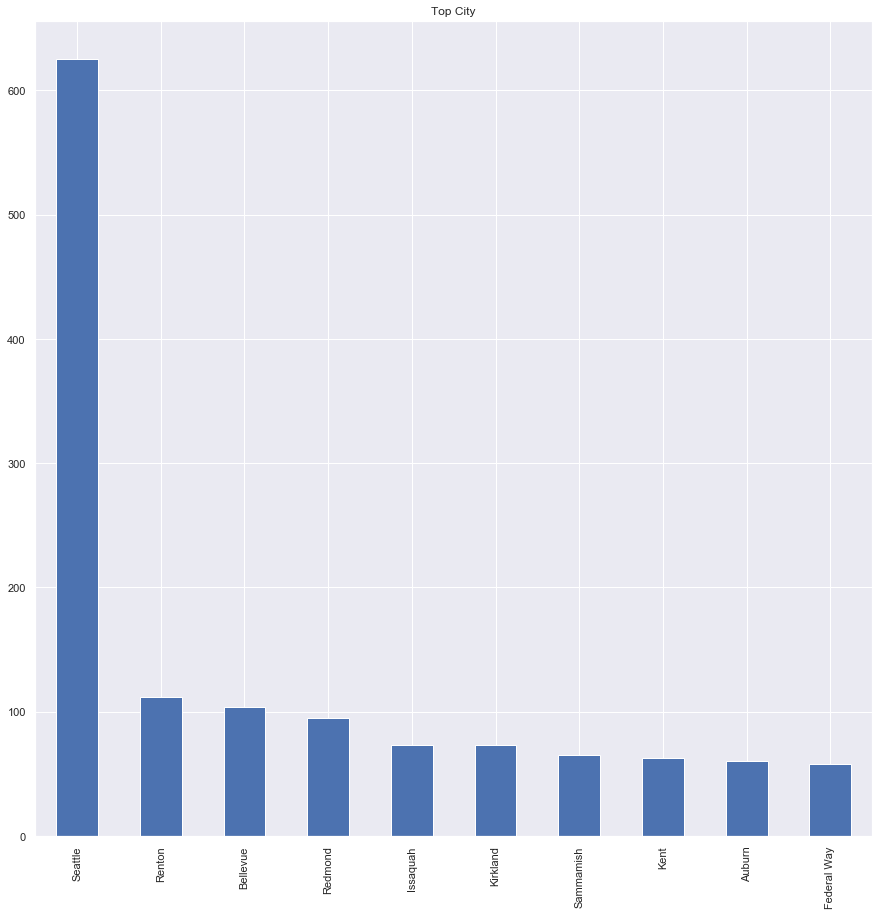

In [73]:
sns.set(rc={'figure.figsize':(15,15)})
viz_1=top_city5.plot(kind='bar')
viz_1.set_title('Top City')
viz_1.set_xticklabels(viz_1.get_xticklabels(), rotation=90)

Berdasarkan data diatas, dapat disimpulkan bahwa penjualan terbanyak terletak di kota Seattle dengan jumlah 628 dari total penjualan 1768 pada bulan Mei atau setara dengan 36 %. Top 10 di bulan ini terdiri dari secara berurutan Seattle,Renton,Bellevue,Redmond,Issaquah,Kirkland,Sammamish,Kent,Auburn,Federal Way yang mana menurut sumber, peringkat ini pun sama pada bulan sebelumnya. 

Text(0.5, 1.0, 'Percentage City')

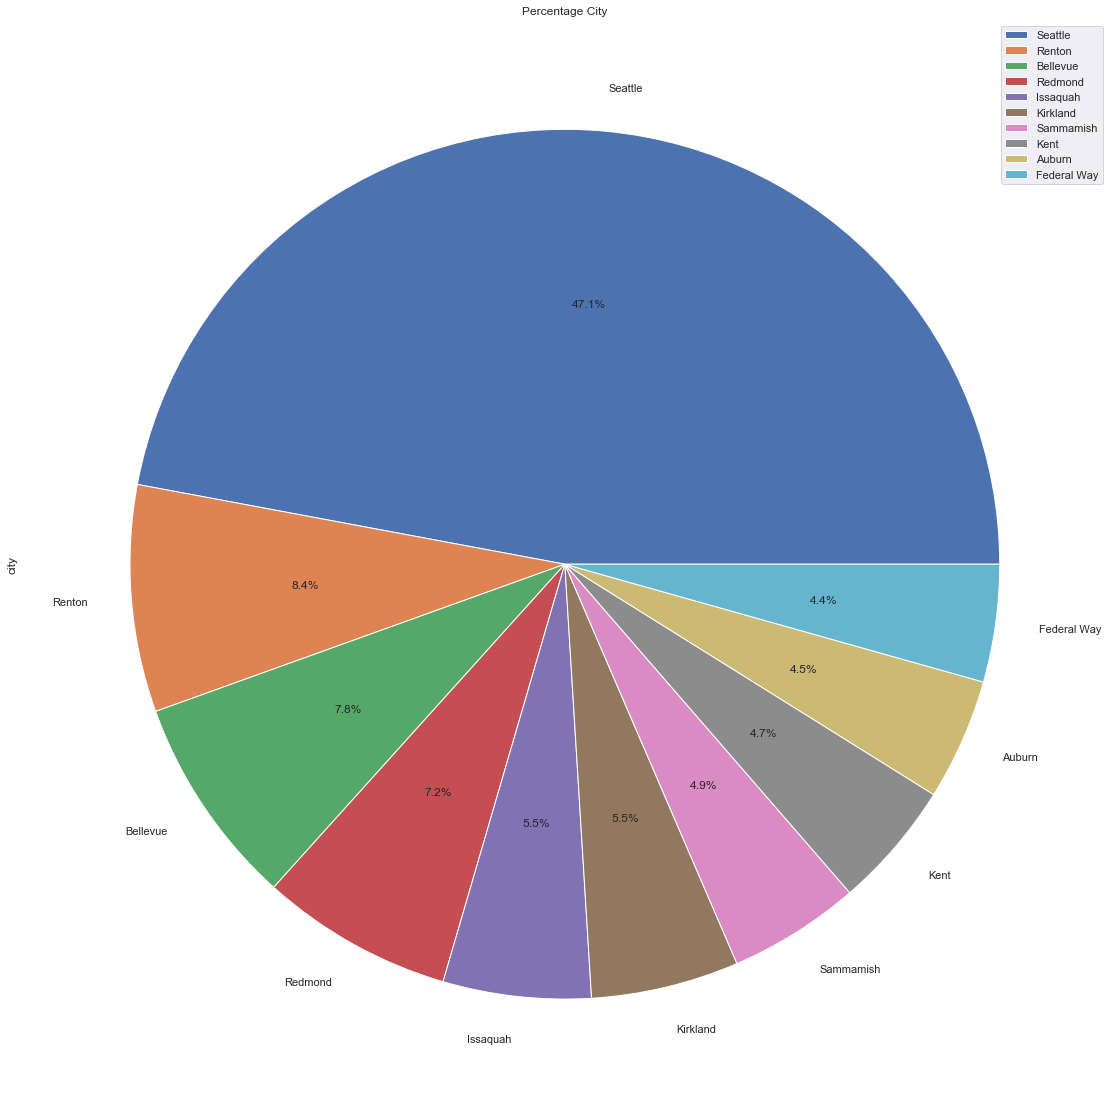

In [74]:
sns.set(rc={'figure.figsize':(20,20)})
viz_1=top_city5.plot(kind='pie',autopct='%1.1f%%',legend=True)
viz_1.set_title('Percentage City')

Berdasarkan data sebelumnya, kita mengetahui bahwa penjualan Seattle mencapai 36% dari keseluruhan kota di USA yaitu 44. Untuk di grafik ini, menunjukkan bahwa dominasi Seattle terhadap 9 kota lain hampir mencapai setengahnya tepatnya 46,9 %. Lalu diikuti dengan Renton hanya 8.4% dan terkecil Federal Way dengan 4.5%.

In [75]:
city1 = house5[house5.city == 'Seattle']
city2 = house5[house5.city == 'Renton'] 
city3 = house5[house5.city == 'Bellevue']
city4 = house5[house5.city == 'Redmond']
city5 = house5[house5.city == 'Kirkland']
city6 = house5[house5.city == 'Issaquah']
city7 = house5[house5.city == 'Kent']
city8 = house5[house5.city == 'Auburn']
city9 = house5[house5.city == 'Sammamish']
city10 = house5[house5.city == 'Federal Way']

Seattle5 =city1.groupby(['day','price']).mean() 
Renton5 =city2.groupby(['day','price']).mean() 
Bellevue5 =city3.groupby(['day','price']).mean() 
Redmond5 =city4.groupby(['day','price']).mean()
Kirkland5 =city5.groupby(['day','price']).mean()
Issaquah5 =city6.groupby(['day','price']).mean() 
Kent5 =city7.groupby(['day','price']).mean()
Auburn5 =city8.groupby(['day','price']).mean()
Sammamish5 =city9.groupby(['day','price']).mean() 
Federal_Way5 =city10.groupby(['day','price']).mean()

In [76]:
Seattle5 #seattle5 merupakan rata2 spesifikasi penjualan berdasarkan hari di month 5 city1.groupby(['day','price']).mean()

bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
day price                                                                       
2   235000.0        2.0       1.00       1210.0    9400.0     1.0         0.0   
    295000.0        2.0       2.50       1630.0    1368.0     2.0         0.0   
    365000.0        3.0       1.00       1090.0    6435.0     1.0         0.0   
    385000.0        3.0       3.25       1320.0    1327.0     2.0         0.0   
    436110.0        3.0       2.50       1770.0    1235.0     3.0         0.0   
...                 ...        ...          ...       ...     ...         ...   
30  750000.0        3.5       2.25       2150.0    6537.0     1.0         0.0   
    790000.0        4.0       2.50       2310.0    5100.0     2.0         0.0   
    919204.0        4.0       3.50       3760.0    5000.0     2.0         0.0   
    1365000.0       3.0       2.50       2090.0    6000.0     1.5         0.0   
31  615000.0        3.0       2.25       1760.0    1146.0     3.0         0.0   

               view  condition  sqft_above  sqft_basement  month  
day price                                                         
2   235000.0    0.0        2.0      1210.0            0.0    5.0  
    295000.0    0.0        3.0      1280.0          350.0    5.0  
    365000.0    0.0        4.0      1090.0            0.0    5.0  
    385000.0    0.0        3.0      1040.0          280.0    5.0  
    436110.0    0.0        3.0      1600.0          170.0    5.0  
...             ...        ...         ...            ...    ...  
30  750000.0    0.0        3.0      1510.0          640.0    5.0  
    790000.0    0.0        3.0      2310.0            0.0    5.0  
    919204.0    0.0        3.0      2860.0          900.0    5.0  
    1365000.0   0.0        4.0      2090.0            0.0    5.0  
31  615000.0    0.0        3.0      1760.0            0.0    5.0  

[610 rows x 11 columns]

In [124]:
# Renton5

In [125]:
# Bellevue5

In [126]:
# Redmond5

In [127]:
# Kirkland5

In [128]:
# Issaquah5

In [129]:
# Kent5

In [130]:
# Auburn5

In [131]:
# Sammamish5

In [132]:
# Federal_Way5

In [77]:
Seattle5 =city1.groupby('day').count() #total penjualan perhari
Renton5 =city2.groupby('day').count() 
Bellevue5 =city3.groupby('day').count() 
Redmond5 =city4.groupby('day').count()
Kirkland5 =city5.groupby('day').count()
Issaquah5 =city6.groupby('day').count() 
Kent5 =city7.groupby('day').count()
Auburn5 =city8.groupby('day').count()
Sammamish5 =city9.groupby('day').count() 
Federal_Way5 =city10.groupby('day').count()

In [134]:
# Seattle5

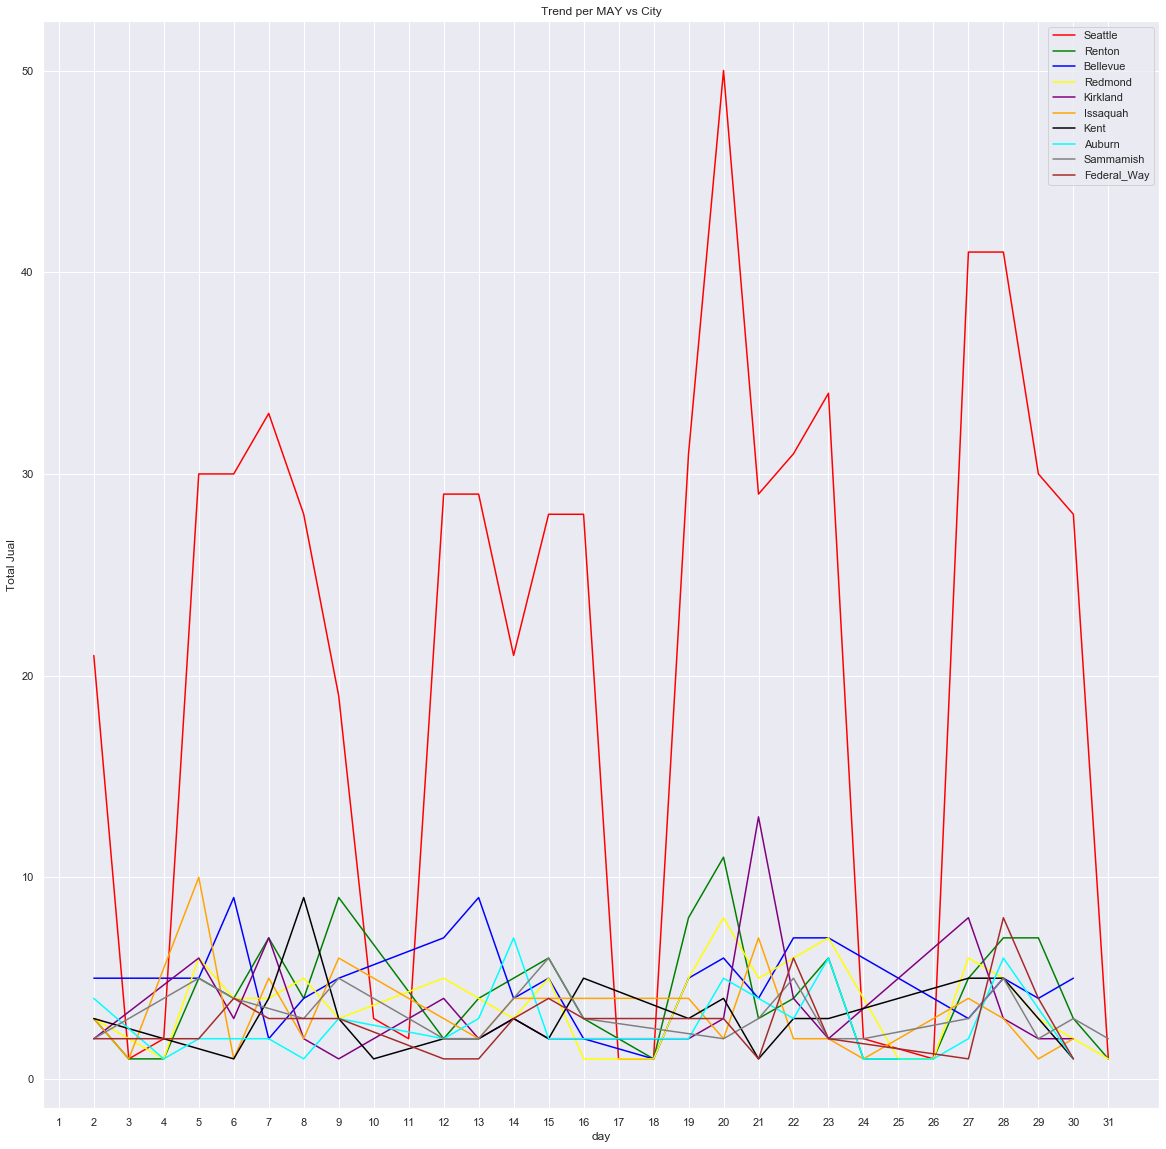

In [78]:
Seattle5['city'].plot(kind='line', color='red',label='Seattle')
Renton5['city'].plot(kind='line', color='green',label='Renton')
Bellevue5['city'].plot(kind='line', color='blue',label='Bellevue')
Redmond5['city'].plot(kind='line', color='yellow',label='Redmond')
Kirkland5['city'].plot(kind='line', color='purple',label='Kirkland')
Issaquah5['city'].plot(kind='line', color='orange',label='Issaquah')
Kent5['city'].plot(kind='line', color='black',label='Kent')
Auburn5['city'].plot(kind='line', color='cyan',label='Auburn')
Sammamish5['city'].plot(kind='line', color='grey',label='Sammamish')
Federal_Way5['city'].plot(kind='line', color='brown',label='Federal_Way')
hari=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31] # list untuk penamaan sumbu x
plt.ylabel('Total Jual') # penamaan sumbu y
plt.xticks(hari) #penamaan sumbu x
plt.title('Trend per MAY vs City') #judul
plt.legend() #legend

Berdasarkan grafik diatas, dapat dilihat, dominasi Seattle sudah terlihat di bulan Mei dengan penjualan terbanyak terjadi pada hari ke 20 dengan 51 rumah dan angka penjualan terkecil untuk Seattle terletak di tanggal 31,26,18,17,3 dengan hanya 1 rumah. Untuk 9 kota lainnya, terlihat cukup berkutik diantara 0-10 untuk setiap harinya di bulan Mei. Ada dua kota yang melewati angka tersebut yaitu Kirkland dan Renton masing-masing di hari ke 21 dengan 13 dan di hari ke 20 dengan 11 rumah.

### KESIMPULAN BULAN 5

# MONTH 6 ( TOP CITY )
- jumlah transaksi yang terjadi di bulan 6
- rata-rata penjualan di bulan 6
- top 10 di bulan 6
- visualisasi penjualan top 10 di bulan 6
- rincian spesifikasi penjualan perhari untuk per city di bulan 6
- visualisasi penjualan per harinya di top 10 di bulan 6
- kesimpulan bulan 6

In [79]:
house6 = house[house.month == 6]

In [80]:
# DATA PENJUALAN BULAN 6 PER CITY

In [81]:
house6.pivot_table(index='city', values='price', aggfunc=['sum', 'min', 'max', 'median', 'mean']).head(50)

,sum,min,max,median,mean
,price,price,price,price,price
city,,,,,
Auburn,2.568887e+07,1.500000e+05,785000.0,270000.0,2.886390e+05
Bellevue,1.295586e+08,3.650000e+05,7062500.0,775000.0,9.596933e+05
Black Diamond,7.555000e+05,2.240000e+05,531500.0,377750.0,3.777500e+05
Bothell,7.970470e+06,3.470000e+05,749995.0,436500.0,4.688512e+05
Burien,1.591514e+07,1.000000e+05,1035000.0,324950.0,3.701196e+05
Carnation,4.613693e+06,2.800000e+05,739000.0,425346.5,4.613693e+05
Clyde Hill,2.713000e+06,1.325000e+06,1388000.0,1356500.0,1.356500e+06
Covington,5.939507e+06,2.000000e+05,490000.0,264950.0,2.828337e+05


Berdasarkan data diatas kita dapat melihat bahwa penjualan terbanyak terletak pada kota Seattle dengan jumlah 4.265328e+08 yang menegaskan bahwa kota ini masih memimpin untuk menjadi area terprofit di bulan 6 dan mengalami kenaikkan yang sebelumnya 3.503741e+08 , sedangkan area tertidak profit berada di Milton dengan total penjualan 3.200000e+05.

###  JUMLAH TRANSAKSI YANG TERJADI DI BULAN 6

In [82]:
house6['month'].count()

2153

In [83]:
house6.pivot_table(index='city', values='month', aggfunc=['count'])

,count
,month
city,
Auburn,89
Bellevue,135
Black Diamond,2
Bothell,17
Burien,43
Carnation,10
Clyde Hill,2
Covington,21


Berdasarkan data diatas, penjualan di berbagai kota di USA memiliki kenaikkan yang sangat jelas adanya dan cukup lebih merata di bandingkan sebelumnya. Penjualan terbaik masih terletak di kota Seattle dengan 725 dan yang terburuk ada di kota Skykomish,Ravendale,Milton dengan 1 transasksi saja.

### RATA-RATA PENJUALAN DI BULAN 6

In [84]:
house6['price'].mean()

553475.1583942241

In [85]:
house6.pivot_table(index='city', values='price', aggfunc=['mean'])

,mean
,price
city,
Auburn,2.886390e+05
Bellevue,9.596933e+05
Black Diamond,3.777500e+05
Bothell,4.688512e+05
Burien,3.701196e+05
Carnation,4.613693e+05
Clyde Hill,1.356500e+06
Covington,2.828337e+05


Berdasarkan data diatas, dapat dilihat bahwa harga dengan rata-rata jual tertinggi terletak di Medina dengan 1.518333e+06 dan rata-rata harga jual terendah ada di Pacific dengan 2.412000e+05

In [86]:
house6['city'].nunique()

40

In [87]:
top_city6=house6.city.value_counts().head(10)
top_city6

Seattle        716
Renton         142
Bellevue       135
Redmond         99
Kent            93
Auburn          89
Kirkland        88
Issaquah        86
Sammamish       80
Federal Way     62
Name: city, dtype: int64

### VISUALISASI PENJUALAN TOP 10 DI BULAN 6

[Text(0, 0, 'Seattle'),
 Text(0, 0, 'Renton'),
 Text(0, 0, 'Bellevue'),
 Text(0, 0, 'Redmond'),
 Text(0, 0, 'Kent'),
 Text(0, 0, 'Auburn'),
 Text(0, 0, 'Kirkland'),
 Text(0, 0, 'Issaquah'),
 Text(0, 0, 'Sammamish'),
 Text(0, 0, 'Federal Way')]

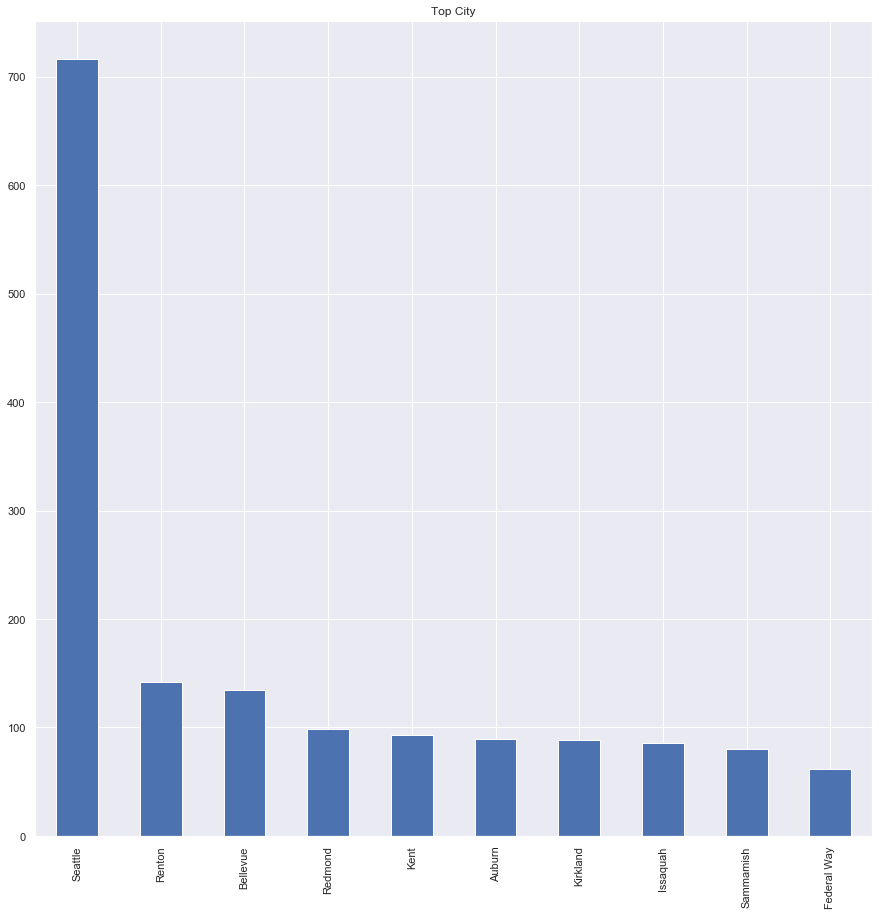

In [88]:
sns.set(rc={'figure.figsize':(15,15)})
viz_1=top_city6.plot(kind='bar')
viz_1.set_title('Top City')
viz_1.set_xticklabels(viz_1.get_xticklabels(), rotation=90)

Berdasarkan data diatas, dapat disimpulkan bahwa penjualan terbanyak masih terletak di kota Seattle dengan jumlah 725 naik 97 buah dari sebelumnya berjumlah 628 dari total penjualan keseluruhan USA =2179 pada bulan Juni atau setara dengan 33 % dari total bulan ini. Top 10 di bulan ini terdiri dari secara berurutan Seattle,Renton,Bellevue,Redmond,Kent,Auburn,Kirkland,Issaquah,Sammamish,dan Federal Way. Kent dan Auburn mengalami penaikkan dari sebelumnya berada di posisi 8 dan 9,Lalu Issaquah mengalami penurunan dari sebelumnya posisi ke 4. Kirkland naik ke posisi 6 dari sebelumnya posisi ke 7. Federal Way masih berada di posisi 10 untuk bulan ini.

Text(0.5, 1.0, 'Percentage City')

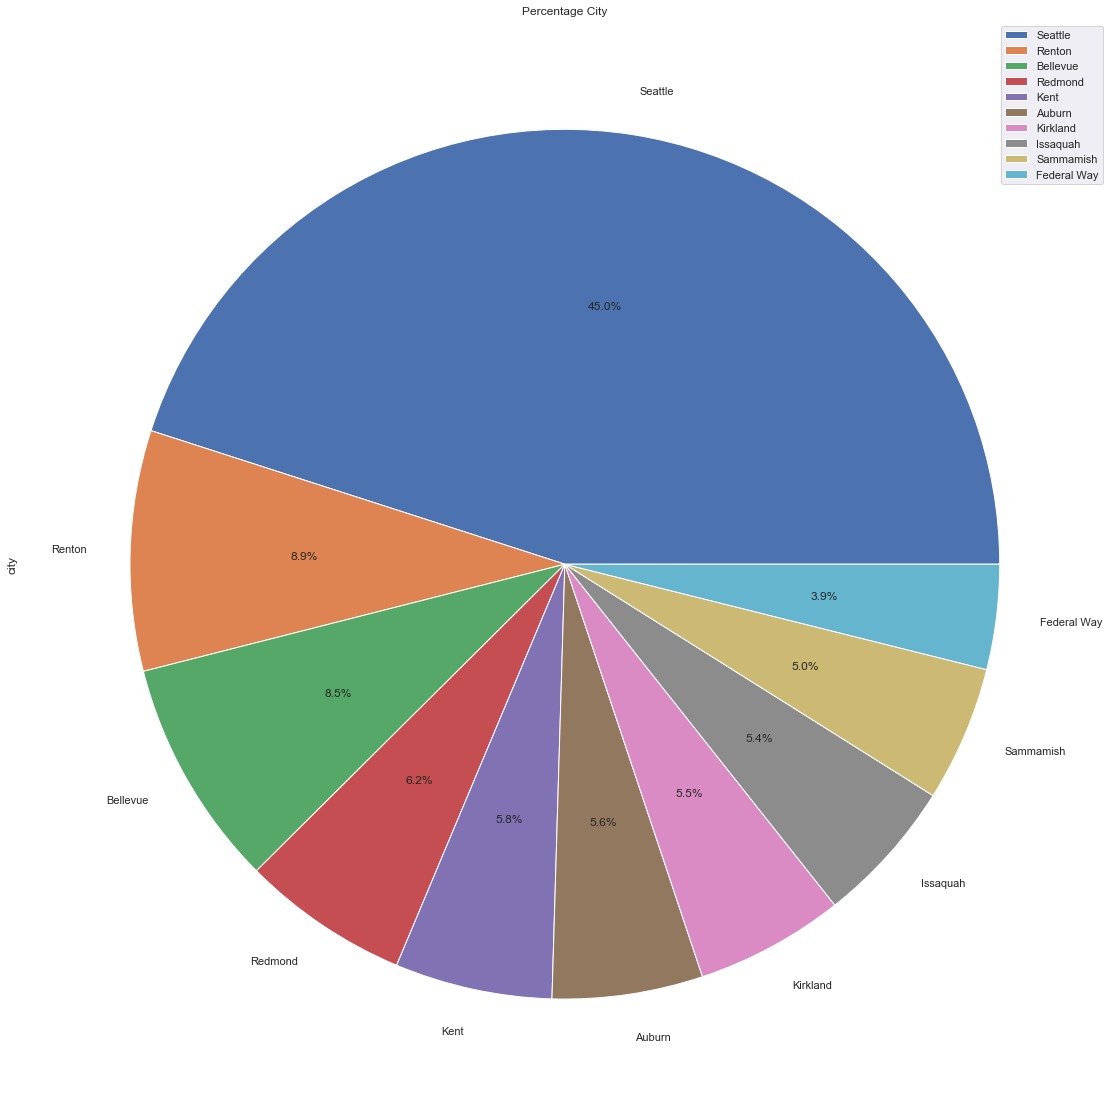

In [89]:
sns.set(rc={'figure.figsize':(20,20)})
viz_1=top_city6.plot(kind='pie',autopct='%1.1f%%',legend=True)
viz_1.set_title('Percentage City')

Untuk di grafik ini, menunjukkan bahwa dominasi Seattle terhadap 9 kota lain masih terus berlanjut hingga hampir mencapai setengahnya tepatnya 45.1% dari total 2179 meski awalnya berada di 46,9 % akan tetapi dengan penjualan lebih sedikit. Lalu diikuti dengan Renton dengan 8.9% naik dari sebelumnya 8.4% dan terkecil Federal Way dengan 3.9% dari sebelumnya 4.5%. Data ini merupakan persentase dari total 2179 penjualan

In [90]:
city1 = house6[house6.city == 'Seattle']
city2 = house6[house6.city == 'Renton'] 
city3 = house6[house6.city == 'Bellevue']
city4 = house6[house6.city == 'Redmond']
city5 = house6[house6.city == 'Kirkland']
city6 = house6[house6.city == 'Issaquah']
city7 = house6[house6.city == 'Kent']
city8 = house6[house6.city == 'Auburn']
city9 = house6[house6.city == 'Sammamish']
city10 = house6[house6.city == 'Federal Way']

Seattle6 =city1.groupby(['day','price']).mean() 
Renton6 =city2.groupby(['day','price']).mean() 
Bellevue6 =city3.groupby(['day','price']).mean() 
Redmond6 =city4.groupby(['day','price']).mean()
Kirkland6 =city5.groupby(['day','price']).mean()
Issaquah6 =city6.groupby(['day','price']).mean() 
Kent6 =city7.groupby(['day','price']).mean()
Auburn6 =city8.groupby(['day','price']).mean()
Sammamish6 =city9.groupby(['day','price']).mean() 
Federal_Way6 =city10.groupby(['day','price']).mean()

In [91]:
# Seattle6 #group by hari dan harga di bulan 6

In [92]:
# Renton6

In [93]:
# Bellevue6

In [94]:
# Redmond6

In [95]:
# Kirkland6

In [96]:
# Issaquah6

In [97]:
# Kent6

In [98]:
# Auburn6

In [99]:
# Sammamish6

In [100]:
# Federal_Way6

In [101]:
Seattle6 =city1.groupby('day').count() #mengetahui jumlah per hari
Renton6 =city2.groupby('day').count() 
Bellevue6 =city3.groupby('day').count() 
Redmond6 =city4.groupby('day').count()
Kirkland6 =city5.groupby('day').count()
Issaquah6 =city6.groupby('day').count() 
Kent6 =city7.groupby('day').count()
Auburn6 =city8.groupby('day').count()
Sammamish6 =city9.groupby('day').count() 
Federal_Way6 =city10.groupby('day').count()

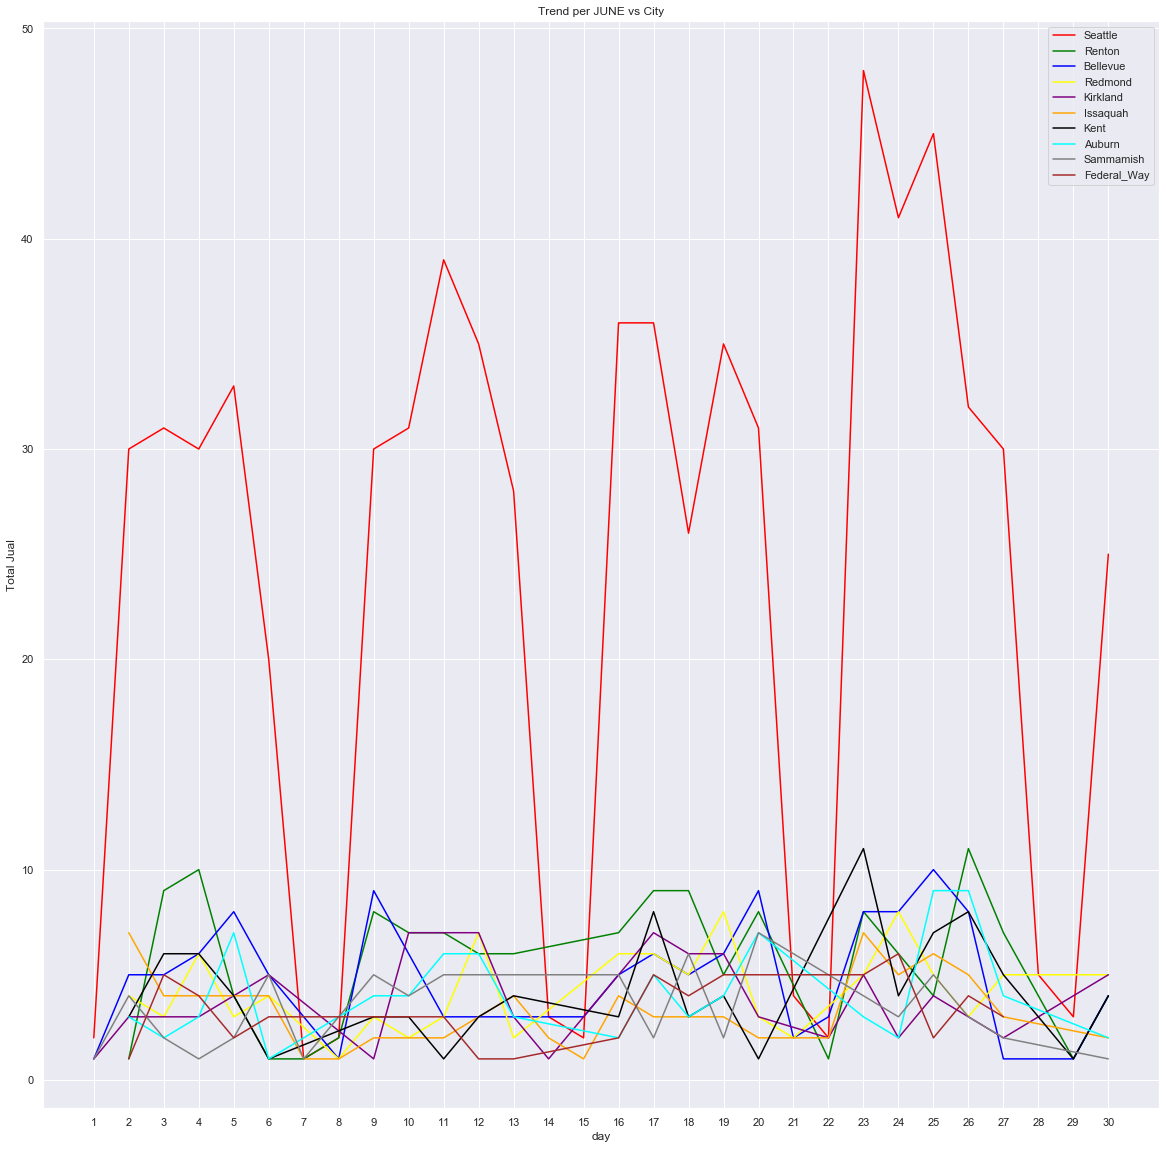

In [102]:
Seattle6['price'].plot(kind='line', color='red',label='Seattle')
Renton6['price'].plot(kind='line', color='green',label='Renton')
Bellevue6['price'].plot(kind='line', color='blue',label='Bellevue')
Redmond6['price'].plot(kind='line', color='yellow',label='Redmond')
Kirkland6['price'].plot(kind='line', color='purple',label='Kirkland')
Issaquah6['price'].plot(kind='line', color='orange',label='Issaquah')
Kent6['price'].plot(kind='line', color='black',label='Kent')
Auburn6['price'].plot(kind='line', color='cyan',label='Auburn')
Sammamish6['price'].plot(kind='line', color='grey',label='Sammamish')
Federal_Way6['price'].plot(kind='line', color='brown',label='Federal_Way')
hari=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30] # list untuk penamaan sumbu x
plt.ylabel('Total Jual') # penamaan sumbu y
plt.xticks(hari) #penamaan sumbu x
plt.title('Trend per JUNE vs City') #judul
plt.legend() #legend

Berdasarkan grafik tersebut dapat kita lihat bahwa perubahan yang signifikan terlihat di kota Seattle, pada hari ke 23 contohnya, penjualan mencapai 48, untuk penjualan tersedikit di kota ini terletak di hari ke 7 dengan hanya 1 saja. Lalu untuk ke 9 kota lainnya, angka penjualan cukup konstant diantara 1 - 10 penjualan untuk setiap harinya. Angka terbesar terjadi di kota Kent pada hari ke 23 dengan jumlah 11 penjualan dan di kota Renton di hari 26 dengan penjualan sebanyak 11. Data untuk bulan Juni tersedia lengkap sampai tanggal 30.

### KESIMPULAN BULAN 6

# MONTH 7 (TOP CITY)
- jumlah transaksi yang terjadi di bulan 7
- rata-rata penjualan di bulan 7
- top 10 di bulan 7
- visualisasi penjualan top 10 di bulan 7
- rincian spesifikasi penjualan perhari untuk per city di bulan 7
- visualisasi penjualan per harinya di top 10 di bulan 7
- kesimpulan bulan 7

In [103]:
house7 = house[house.month == 7]

In [104]:
house7.pivot_table(index='city', values='price', aggfunc=['sum', 'min', 'max', 'median', 'mean']).head(50)

,sum,min,max,median,mean
,price,price,price,price,price
city,,,,,
Auburn,8.621064e+06,1.150000e+05,835000.0,2.946867e+05,3.315794e+05
Bellevue,3.357916e+07,2.480000e+05,1875000.0,7.245160e+05,7.995038e+05
Black Diamond,1.415000e+06,2.550000e+05,650000.0,5.100000e+05,4.716667e+05
Bothell,4.045112e+06,3.681125e+05,720000.0,4.790000e+05,5.056391e+05
Burien,2.563333e+06,1.683333e+05,568000.0,2.975000e+05,3.204167e+05
Carnation,1.490000e+06,6.500000e+05,840000.0,7.450000e+05,7.450000e+05
Clyde Hill,5.100000e+06,1.300000e+06,3800000.0,2.550000e+06,2.550000e+06
Covington,8.835000e+05,2.050000e+05,237950.0,2.202750e+05,2.208750e+05


Berdasarkan data diatas kita dapat melihat bahwa penjualan terbanyak hingga 10 Juli masih terletak pada kota Seattle dengan jumlah 1.351775e+08 yang menegaskan bahwa kota ini masih memimpin untuk menjadi area terprofit di bulan 7 dan sedangkan area tertidak profit berada di Skykomish dengan total penjualan 1.500000e+05 hingga 10 Juli.

### JUMLAH TRANSAKSI YANG TERJADI DI BULAN 7

In [105]:
house7['month'].count()

648

In [106]:
house7.pivot_table(index='city', values='month', aggfunc=['count'])

,count
,month
city,
Auburn,26
Bellevue,42
Black Diamond,3
Bothell,8
Burien,8
Carnation,2
Clyde Hill,2
Covington,4


Berdasarkan data diatas, penjualan di berbagai kota di USA 10 hari di bulan Juli termasuk kontras di beberapa kota. Penjualan terbaik masih terletak di kota Seattle dengan 220 dan yang terburuk ada di kota Skykomish,LakeForest,Milton dengan 1 transasksi saja.

### RATA-RATA PENJUALAN DI BULAN 7

In [107]:
house7['price'].mean()

619148.6200315246

In [108]:
house7.pivot_table(index='city', values='price', aggfunc=['mean'])

,mean
,price
city,
Auburn,3.315794e+05
Bellevue,7.995038e+05
Black Diamond,4.716667e+05
Bothell,5.056391e+05
Burien,3.204167e+05
Carnation,7.450000e+05
Clyde Hill,2.550000e+06
Covington,2.208750e+05


Berdasarkan data diatas, dapat dilihat bahwa harga dengan rata-rata tertinggi terletak di Medina dengan 2.469717e+06 dan rata-rata harga terendah ada di Skykomish dengan 1.500000e+05

In [109]:
house7['city'].nunique()

37

### TOP 10 DI BULAN 7

In [110]:
top_city7=house7.city.value_counts().head(10)
top_city7

Seattle        219
Bellevue        42
Redmond         40
Renton          37
Kent            28
Issaquah        27
Kirkland        26
Sammamish       26
Auburn          26
Federal Way     25
Name: city, dtype: int64

### VISUALISASI PENJUALAN TOP 10 DI BULAN 7

[Text(0, 0, 'Seattle'),
 Text(0, 0, 'Bellevue'),
 Text(0, 0, 'Redmond'),
 Text(0, 0, 'Renton'),
 Text(0, 0, 'Kent'),
 Text(0, 0, 'Issaquah'),
 Text(0, 0, 'Kirkland'),
 Text(0, 0, 'Sammamish'),
 Text(0, 0, 'Auburn'),
 Text(0, 0, 'Federal Way')]

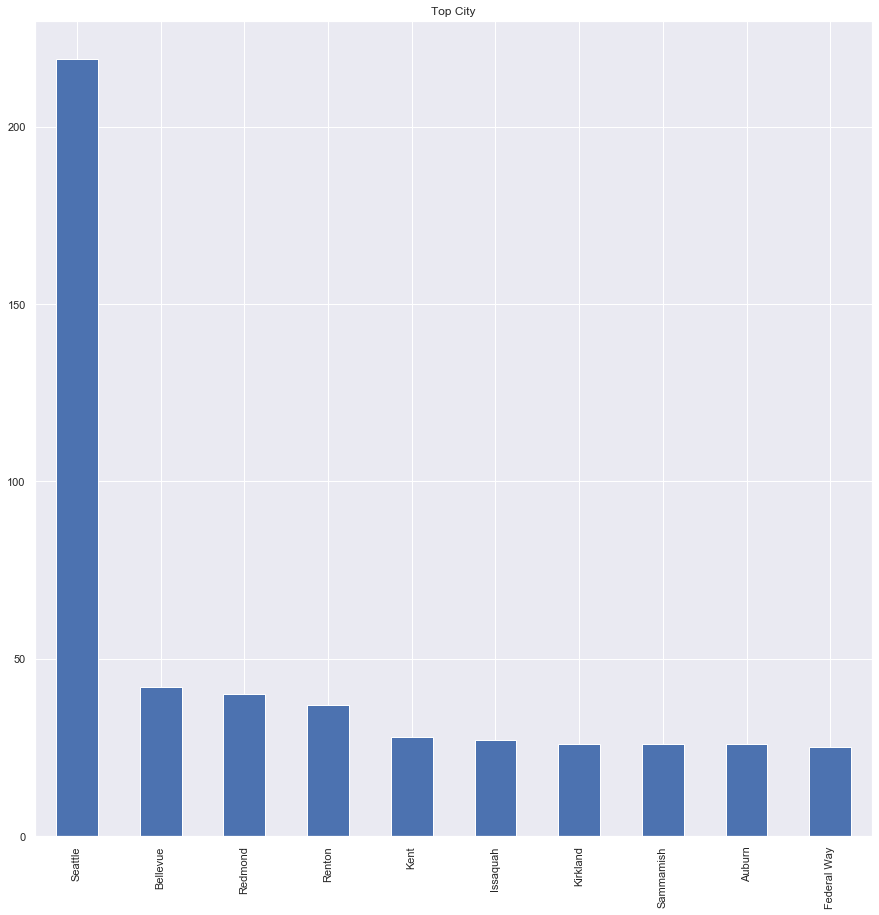

In [111]:
sns.set(rc={'figure.figsize':(15,15)})
viz_1=top_city7.plot(kind='bar')
viz_1.set_title('Top City')
viz_1.set_xticklabels(viz_1.get_xticklabels(), rotation=90)

Text(0.5, 1.0, 'Percentage City')

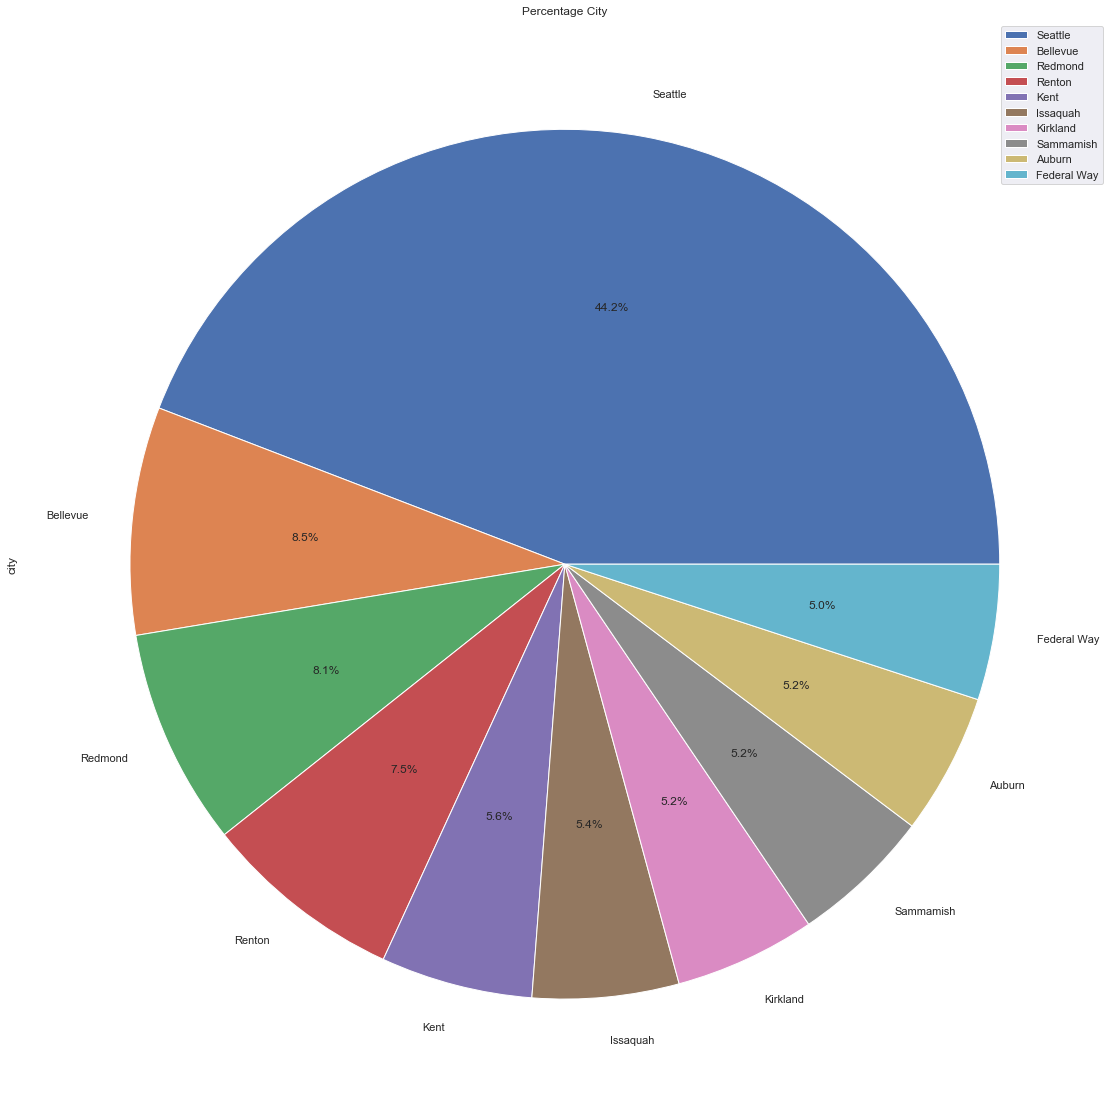

In [112]:
sns.set(rc={'figure.figsize':(20,20)})
viz_1=top_city7.plot(kind='pie',autopct='%1.1f%%',legend=True)
viz_1.set_title('Percentage City')

In [113]:
city1 = house7[house7.city == 'Seattle']
city2 = house7[house7.city == 'Renton'] 
city3 = house7[house7.city == 'Bellevue']
city4 = house7[house7.city == 'Redmond']
city5 = house7[house7.city == 'Kirkland']
city6 = house7[house7.city == 'Issaquah']
city7 = house7[house7.city == 'Kent']
city8 = house7[house7.city == 'Auburn']
city9 = house7[house7.city == 'Sammamish']
city10 = house7[house7.city == 'Federal Way']

Seattle7 =city1.groupby(['day','price']).mean() #mengetahui rata-rata penjualan perhari
Renton7 =city2.groupby(['day','price']).mean() 
Bellevue7 =city3.groupby(['day','price']).mean() 
Redmond7 =city4.groupby(['day','price']).mean()
Kirkland7 =city5.groupby(['day','price']).mean()
Issaquah7 =city6.groupby(['day','price']).mean() 
Kent7 =city7.groupby(['day','price']).mean()
Auburn7 =city8.groupby(['day','price']).mean()
Sammamish7 =city9.groupby(['day','price']).mean() 
Federal_Way7 =city10.groupby(['day','price']).mean()

### Rincian spesifikasi penjualan perhari untuk per city di bulan 7

In [114]:
# Seattle7 # group by hari dan price

In [115]:
# Renton7

In [116]:
# Bellevue7

In [117]:
# Redmond7

In [118]:
# Kirkland7

In [119]:
# Issaquah7

In [120]:
# Kent7

In [121]:
# Auburn7

In [122]:
# Sammamish7

In [123]:
# Federal_Way7

In [124]:
Seattle7 =city1.groupby('day').count() #mengetahui jumlah perhari
Renton7 =city2.groupby('day').count() 
Bellevue7 =city3.groupby('day').count() 
Redmond7 =city4.groupby('day').count()
Kirkland7 =city5.groupby('day').count()
Issaquah7 =city6.groupby('day').count() 
Kent7 =city7.groupby('day').count()
Auburn7 =city8.groupby('day').count()
Sammamish7 =city9.groupby('day').count() 
Federal_Way7 =city10.groupby('day').count()

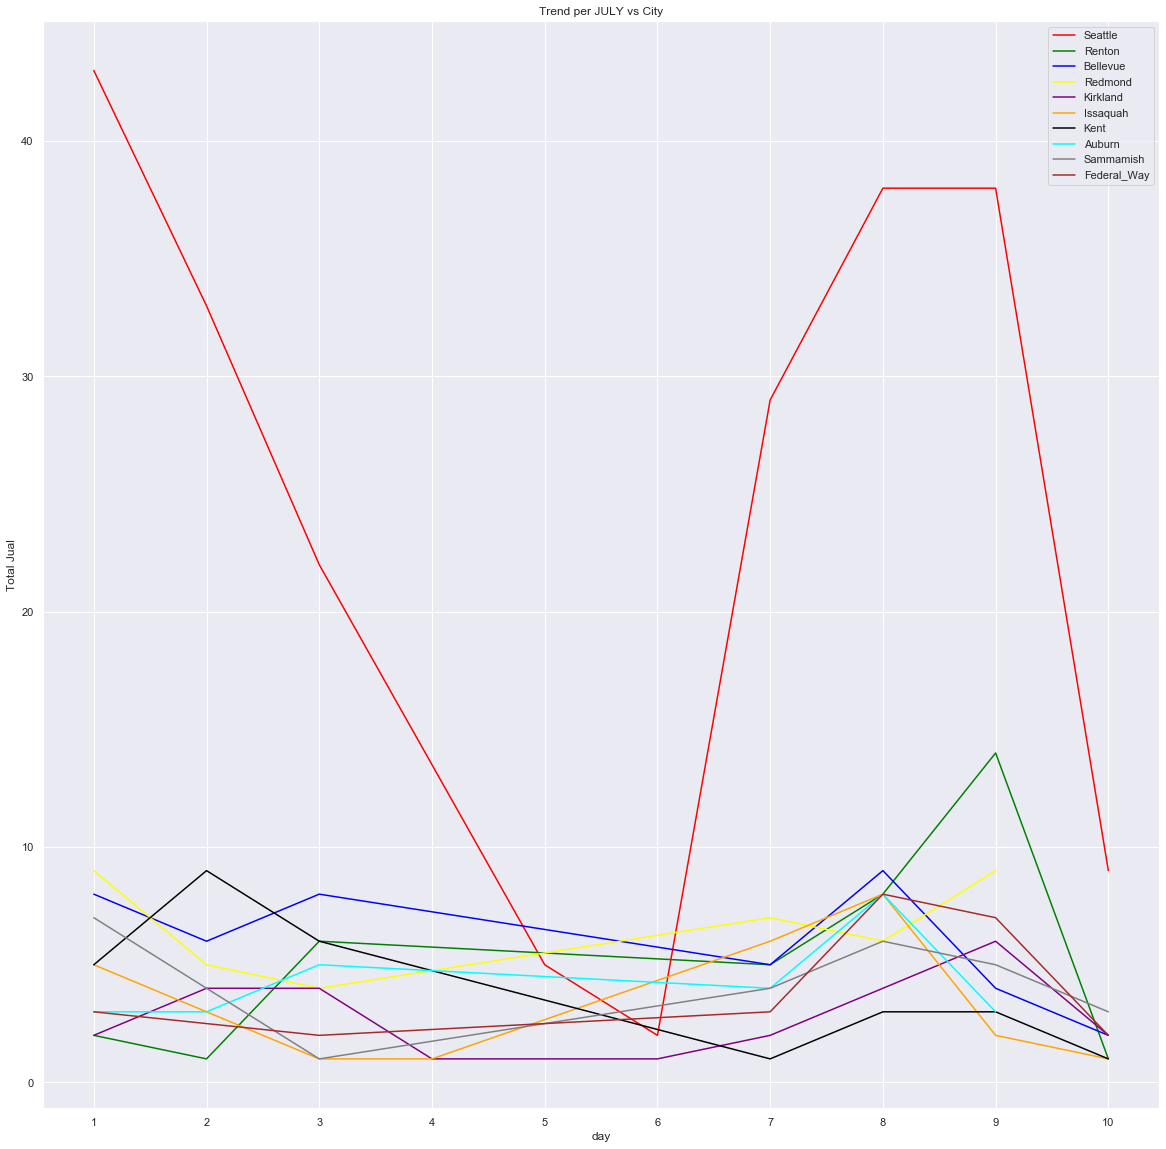

In [125]:
Seattle7['city'].plot(kind='line', color='red',label='Seattle')
Renton7['city'].plot(kind='line', color='green',label='Renton')
Bellevue7['city'].plot(kind='line', color='blue',label='Bellevue')
Redmond7['city'].plot(kind='line', color='yellow',label='Redmond')
Kirkland7['city'].plot(kind='line', color='purple',label='Kirkland')
Issaquah7['city'].plot(kind='line', color='orange',label='Issaquah')
Kent7['city'].plot(kind='line', color='black',label='Kent')
Auburn7['city'].plot(kind='line', color='cyan',label='Auburn')
Sammamish7['city'].plot(kind='line', color='grey',label='Sammamish')
Federal_Way7['city'].plot(kind='line', color='brown',label='Federal_Way')
hari=[1,2,3,4,5,6,7,8,9,10] # list untuk penamaan sumbu x
plt.ylabel('Total Jual') # penamaan sumbu y
plt.xticks(hari) #penamaan sumbu x
plt.title('Trend per JULY vs City') #judul
plt.legend() #legend

Berdasarkan grafik tersebut dapat kita lihat bahwa perubahan yang signifikan terlihat di kota Seattle, pada hari pertama penjualan mencapai 44, untuk penjualan tersedikit terletak di hari ke 6 dengan hanya 2 saja. Lalu untuk ke 9 kota lainnya, angka penjualan cukup konstant diantara 1 - 10 penjualan untuk setiap harinya. Angka terbesar terjadi di kota Renton pada hari ke 9 dengan jumlah 14 penjualan. Data untuk bulan Juli hanya tersedia sampai dengan tanggal 10 saja.

### RANGKUMAN BERDASARKAN PENJUALAN DI TOP 10 CITY PER 3 BULAN

In [126]:
print (" Penjualan bulan 5 terjual di {} kota dengan total {} penjualan ".format(house5['city'].nunique(),house5['month'].count()))
print (" Penjualan bulan 6 terjual di {} kota dengan total {} penjualan".format(house6['city'].nunique(),house6['month'].count()))
print (" Penjualan bulan 7 terjual di {} kota dengan total {} penjualan".format(house7['city'].nunique(),house7['month'].count()))

 Penjualan bulan 5 terjual di 42 kota dengan total 1748 penjualan 
 Penjualan bulan 6 terjual di 40 kota dengan total 2153 penjualan
 Penjualan bulan 7 terjual di 37 kota dengan total 648 penjualan


In [127]:
print("Rata-rata harga jual rumah di USA untuk setiap bulannya dari bulan MEI sampai 10 July adalah ${} , ${} , dan ${}".format(house5['price'].mean(),house6['price'].mean(),house7['price'].mean()))

Rata-rata harga jual rumah di USA untuk setiap bulannya dari bulan MEI sampai 10 July adalah $539930.6505569754 , $553475.1583942241 , dan $619148.6200315246


In [128]:
print("kenaikkan terbesar terjadi dari bulan Mei ke Juni sebanyak {}%".format((house5['month'].count())/(house6['month'].count())*10))

kenaikkan terbesar terjadi dari bulan Mei ke Juni sebanyak 8.118903855085927%


https://www.usatoday.com/story/money/business/2014/01/01/home-prices-2014-housing-starts/4181021/

# BATHROOM
- jenis-jenis bathroom
- jumlah bathroom yang banyak di minati di USA
- jumlah bathroom yang banyak di minati di top 10
- visualisasi jumlah bathroom paling diminati
- visualisasi penjualan bathroom per bulan

In [129]:
house['bathrooms'].unique()

array([1.5 , 2.5 , 2.  , 2.25, 1.  , 1.75, 2.75, 3.  , 3.25, 3.5 , 8.  ,
       4.25, 4.  , 3.75, 5.  , 4.5 , 5.75, 1.25, 6.5 , 4.75, 0.75, 5.25,
       5.5 , 6.25, 6.75])

In [130]:
house['bathrooms'].value_counts().head(5)

2.50    1184
1.00     736
1.75     628
2.00     425
2.25     413
Name: bathrooms, dtype: int64

In [131]:
house.pivot_table(index=['city','bathrooms'],values='month',aggfunc=['count'])

count
                       month
city         bathrooms      
Algona       1.00          2
             2.00          1
             2.50          1
             3.00          1
Auburn       1.00         26
...                      ...
Woodinville  4.75          1
Yarrow Point 1.00          1
             2.00          1
             2.25          1
             2.50          1

[389 rows x 1 columns]

In [132]:
top_bathroom=house.bathrooms.value_counts().head(5)
top_bathroom

2.50    1184
1.00     736
1.75     628
2.00     425
2.25     413
Name: bathrooms, dtype: int64

[Text(0, 0, '2.5'),
 Text(0, 0, '1.0'),
 Text(0, 0, '1.75'),
 Text(0, 0, '2.0'),
 Text(0, 0, '2.25')]

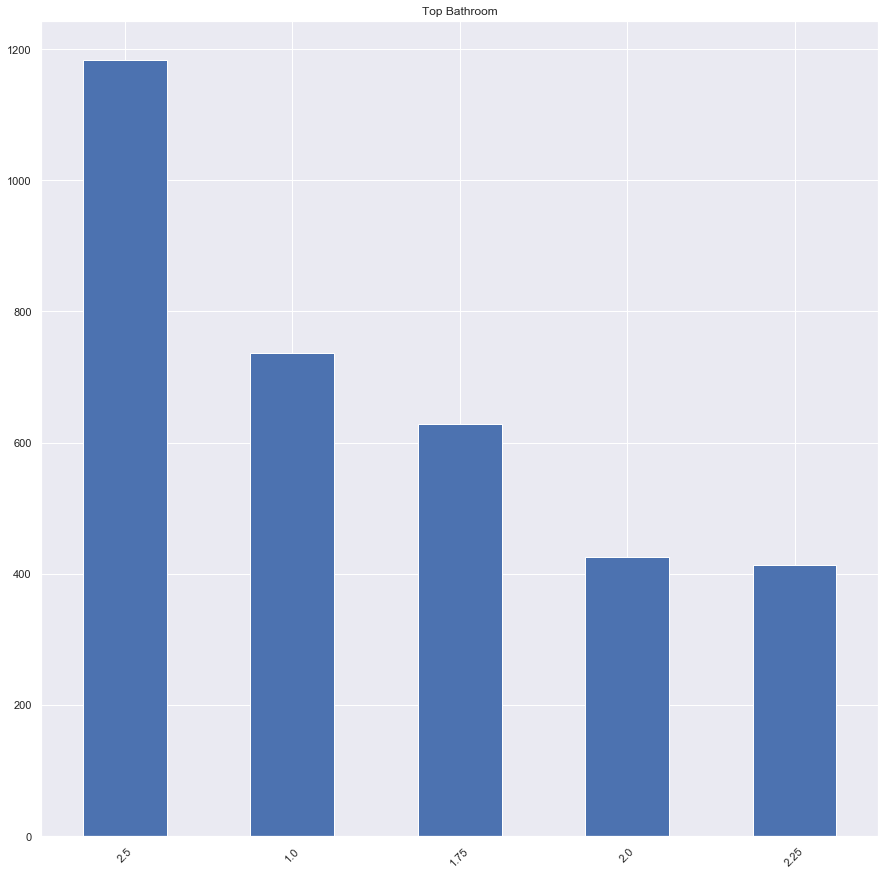

In [133]:
sns.set(rc={'figure.figsize':(15,15)})
viz_1=top_bathroom.plot(kind='bar')
viz_1.set_title('Top Bathroom')
viz_1.set_xticklabels(viz_1.get_xticklabels(), rotation=45)

Persentase didominasi oleh bathroom 2.5. perhitungan bathroom 1 yaitu kamar mandi dengan bathtub, shower, toilet, dan wastafel. sedangkan bathroom 0.5 adalah bathroom dengan toilet dan wastafel saja

Text(0.5, 1.0, 'Percentage Bathroom')

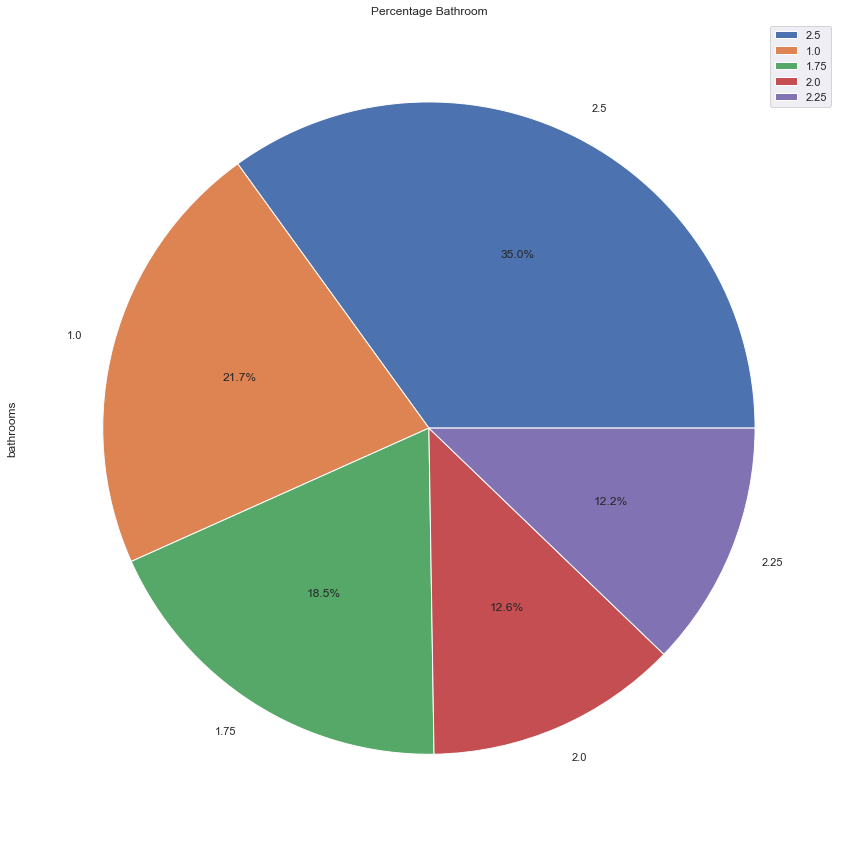

In [134]:
sns.set(rc={'figure.figsize':(15,15)})
viz_1=top_bathroom.plot(kind='pie',autopct='%1.1f%%',legend=True)
viz_1.set_title('Percentage Bathroom')

Berdasarkan persentase diatas, Bathroom 2.5 memiliki persentase terbesar dengan 34.9% dari total 4600 data penjualan. Lalu bathroom 2.25 adalah terkecil dengan 12.3%, berbeda sedikit dengan bathrooom 2.0 dengan 12.5%

Berdasarkan data diatas, data harga penjualan penjualan berdasarkan jumlah bathroom paling meningkat di bathroom 2.5 meskipun terlihat mengalami penurunan. Hal ini disebabkan, data Juli masih sampai tanggal 10 saja, akan tetapi bisa dilihat penjualan terbaik merupakan tipe 2.5

### DATA PENJUALAN BERDASARKAN KONDISI UNTUK 3 BULAN, BULAN MEI, BULAN JUNI, DAN JULI

In [135]:
house.pivot_table(index='bathrooms', values='price', aggfunc=['sum', 'min', 'max', 'median', 'mean']).head(10)

,sum,min,max,median,mean
,price,price,price,price,price
bathrooms,,,,,
0.75,4.997251e+06,80000.0,562100.0,276000.0,293955.941176
1.00,2.471371e+08,7800.0,2110000.0,307500.0,335784.141323
1.25,1.383450e+06,321950.0,545000.0,516500.0,461150.000000
1.50,1.196139e+08,107500.0,2199900.0,368000.0,416773.118467
1.75,2.890567e+08,120750.0,2100000.0,434000.0,460281.412923
2.00,2.249684e+08,83300.0,26590000.0,437500.0,529337.298964
2.25,2.250778e+08,132250.0,2400000.0,478000.0,544982.477882
2.50,6.809465e+08,168000.0,12899000.0,525000.0,575123.729327


In [136]:
house5.pivot_table(index='bathrooms', values='price', aggfunc=['sum', 'min', 'max', 'median', 'mean']).head(10)

,sum,min,max,median,mean
,price,price,price,price,price
bathrooms,,,,,
0.75,1.472550e+06,80000.0,527550.0,275000.0,294510.000000
1.00,1.052769e+08,7800.0,2110000.0,310000.0,339602.845738
1.25,3.219500e+05,321950.0,321950.0,321950.0,321950.000000
1.50,4.479953e+07,107500.0,2199900.0,354000.0,407268.427273
1.75,1.121668e+08,120750.0,2100000.0,438375.0,479345.305937
2.00,8.334530e+07,83300.0,1275000.0,450000.0,468231.996054
2.25,8.283177e+07,190000.0,2400000.0,455000.0,530972.873932
2.50,2.452775e+08,168000.0,2555000.0,516500.0,557448.853275


In [137]:
house6.pivot_table(index='bathrooms', values='price', aggfunc=['sum', 'min', 'max', 'median', 'mean']).head(10)

,sum,min,max,median,mean
,price,price,price,price,price
bathrooms,,,,,
0.75,2.998701e+06,142500.0,562100.0,299000.0,333189.000000
1.00,1.093922e+08,100000.0,899000.0,307000.0,332499.093707
1.25,1.061500e+06,516500.0,545000.0,530750.0,530750.000000
1.50,5.824816e+07,150000.0,1355000.0,375700.0,422088.101449
1.75,1.383564e+08,161700.0,1230000.0,430000.0,444875.767073
2.00,8.466113e+07,84350.0,1400000.0,407193.0,447942.502394
2.25,1.063455e+08,132250.0,2110000.0,489950.0,553883.053406
2.50,3.353141e+08,174500.0,12899000.0,535000.0,588270.284901


In [138]:
house7.pivot_table(index='bathrooms', values='price', aggfunc=['sum', 'min', 'max', 'median', 'mean']).head(10)

,sum,min,max,median,mean
,price,price,price,price,price
bathrooms,,,,,
0.75,5.260000e+05,100000.0,276000.0,150000.0,175333.333333
1.00,3.246804e+07,102500.0,1014250.0,300000.0,334722.103143
1.50,1.656620e+07,209950.0,952500.0,374000.0,424774.358974
1.75,3.853356e+07,198000.0,1300000.0,443000.0,464259.785141
2.00,5.696192e+07,115000.0,26590000.0,545000.0,982102.134647
2.25,3.590045e+07,229000.0,2367000.0,482000.0,552314.596581
2.50,1.003549e+08,175000.0,1675000.0,528850.0,576752.515450
2.75,3.223528e+07,300000.0,2180000.0,692500.0,749657.790698


In [139]:
top_city

Seattle        1560
Renton          291
Bellevue        281
Redmond         234
Kirkland        187
Issaquah        186
Kent            184
Auburn          175
Sammamish       171
Federal Way     145
Name: city, dtype: int64

In [140]:
top = house[(house.city == 'Seattle')|(house.city == 'Renton')|(house.city == 'Bellevue')|(house.city == 'Redmond')|(house.city == 'Kirkland')|(house.city == 'Issaquah')|(house.city == 'Kent')|(house.city == 'Auburn')|(house.city == 'Sammamish')|(house.city == 'Federal Way')]

In [141]:
top.pivot_table(index=['city'], values='bathrooms', aggfunc=['mean', 'median','count'])

,mean,median,count
,bathrooms,bathrooms,bathrooms
city,,,
Auburn,2.090000,2.00,175
Bellevue,2.435053,2.50,281
Federal Way,2.112069,2.25,145
Issaquah,2.588710,2.50,186
Kent,2.142663,2.25,184
Kirkland,2.327540,2.25,187
Redmond,2.391026,2.50,234
Renton,2.119416,2.25,291


### BERDASARKAN DATA DIATAS, KITA DAPAT MELIHAT BAHWA RATA-RATA TOP CITY MEMILKI BATHROOM 2.5
- http://www.hakc.org/sites/www/Uploads/files/Downloads/HQS_Part2_Inspections.pdf

# BEDROOM
- jenis-jenis bedroom
- jumlah bedroom yang banyak di minati di USA
- jumlah bedrooom yang banyak di minati di top 10
- visualisasi jumlah bedroom paling diminati
- visualisasi penjualan bedrooom per bulan

In [142]:
house['bedrooms'].unique()

array([3., 5., 4., 2., 6., 7., 9., 1., 8.])

In [143]:
top_bedroom=house['bedrooms'].value_counts().head(5)
top_bedroom

3.0    2025
4.0    1512
2.0     561
5.0     338
6.0      59
Name: bedrooms, dtype: int64

In [144]:
house.pivot_table(index=['city','bedrooms'],values='month',aggfunc=['count'])

count
                      month
city         bedrooms      
Algona       2.0          1
             3.0          2
             4.0          2
Auburn       1.0          1
             2.0         13
...                     ...
Woodinville  5.0          6
             6.0          1
Yarrow Point 3.0          2
             4.0          1
             5.0          1

[187 rows x 1 columns]

[Text(0, 0, '3.0'),
 Text(0, 0, '4.0'),
 Text(0, 0, '2.0'),
 Text(0, 0, '5.0'),
 Text(0, 0, '6.0')]

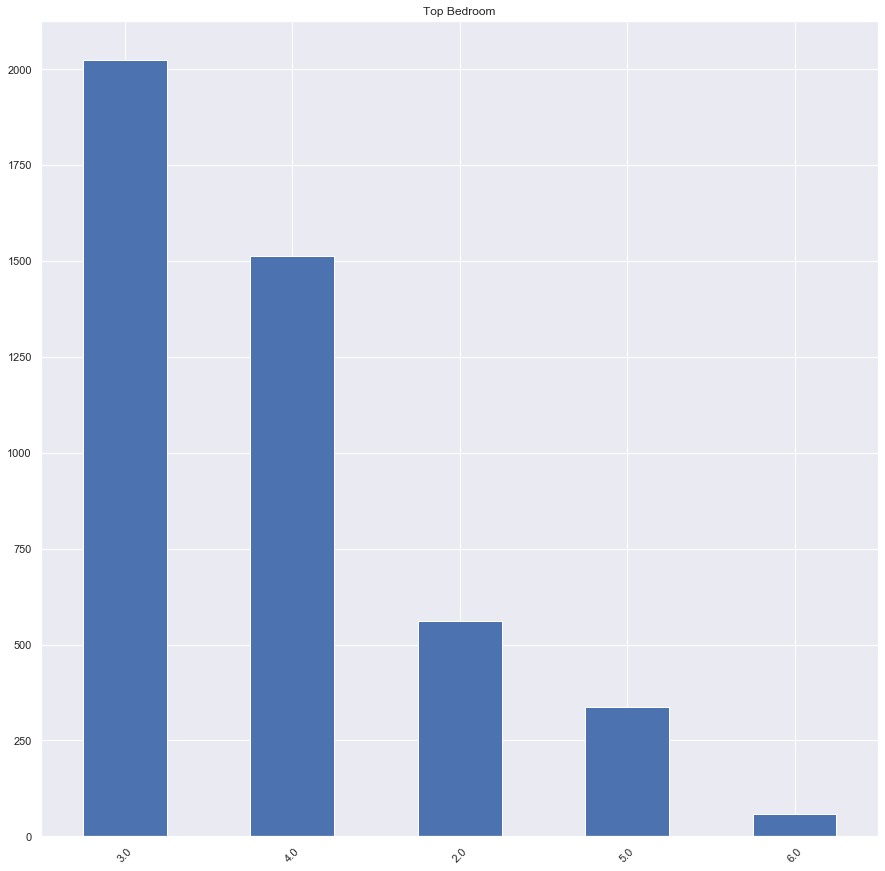

In [145]:
sns.set(rc={'figure.figsize':(15,15)})
viz_1=top_bedroom.plot(kind='bar')
viz_1.set_title('Top Bedroom')
viz_1.set_xticklabels(viz_1.get_xticklabels(), rotation=45)

Berdasarkan grafik diatas, dapat dilihat bahwa bedroom 3 menduduki posisi pertama dengan jumlah 2032 penjualan

Text(0.5, 1.0, 'Percentage Bedroom')

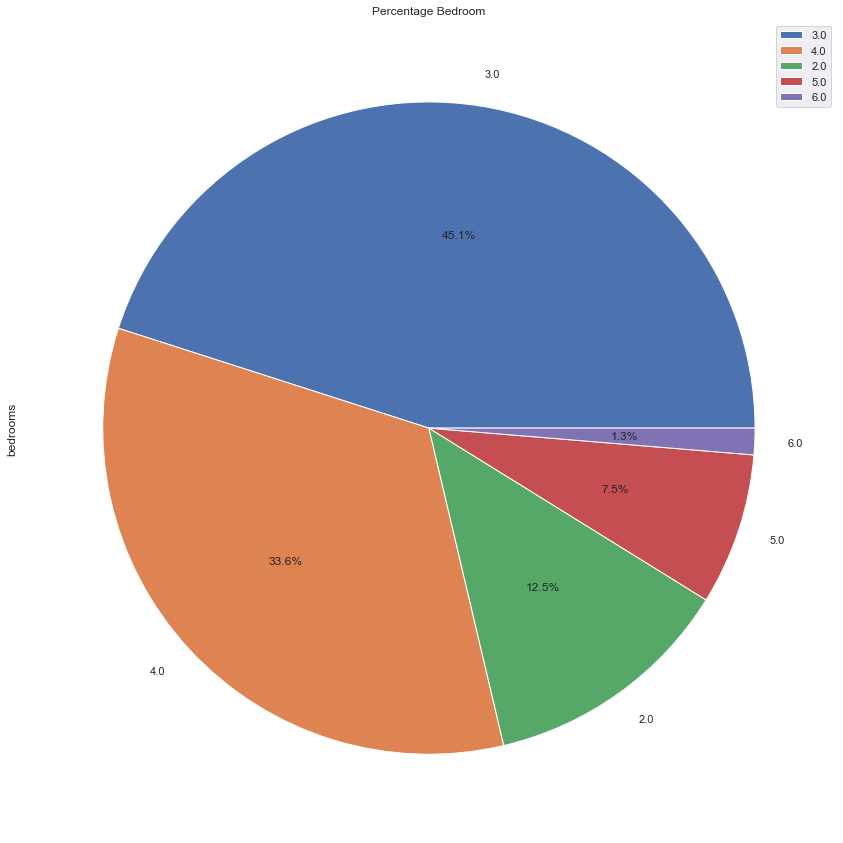

In [146]:
sns.set(rc={'figure.figsize':(15,15)})
viz_1=top_bedroom.plot(kind='pie',autopct='%1.1f%%',legend=True)
viz_1.set_title('Percentage Bedroom')

Berdasarkan data diatas terlihat bahwa bedroom dengan jumlah 3 mendominasi dengan persentase 44.7 %

In [147]:
house.pivot_table(index='bedrooms', values='price', aggfunc=['sum', 'min', 'max', 'median', 'mean']).head(10)

,sum,min,max,median,mean
,price,price,price,price,price
bedrooms,,,,,
1.0,1.041490e+07,80000.0,540000.0,275000.0,2.814838e+05
2.0,2.216580e+08,7800.0,1695000.0,370000.0,3.951123e+05
3.0,9.928617e+08,83300.0,26590000.0,425000.0,4.903021e+05
4.0,9.723677e+08,84350.0,4489000.0,575000.0,6.431004e+05
5.0,2.718757e+08,185000.0,7062500.0,599000.0,8.043658e+05
6.0,4.985913e+07,175000.0,3100000.0,670000.0,8.450701e+05
7.0,1.469200e+07,280000.0,3200000.0,711500.0,1.049429e+06
8.0,2.310000e+06,340000.0,1970000.0,1155000.0,1.155000e+06


In [148]:
house5.pivot_table(index='bedrooms', values='price', aggfunc=['sum', 'min', 'max', 'median', 'mean']).head(10)

,sum,min,max,median,mean
,price,price,price,price,price
bedrooms,,,,,
1.0,3.968400e+06,80000.0,540000.0,317500.0,3.307000e+05
2.0,8.826310e+07,7800.0,1425000.0,368000.0,3.820913e+05
3.0,3.590628e+08,83300.0,2400000.0,410000.0,4.585732e+05
4.0,3.691692e+08,107500.0,3710000.0,584000.0,6.499458e+05
5.0,9.354486e+07,195000.0,2700000.0,559000.0,7.543940e+05
6.0,1.777140e+07,260000.0,3100000.0,777100.0,8.885700e+05
7.0,9.449000e+06,475000.0,3200000.0,702500.0,1.181125e+06
8.0,1.970000e+06,1970000.0,1970000.0,1970000.0,1.970000e+06


In [149]:
house6.pivot_table(index='bedrooms', values='price', aggfunc=['sum', 'min', 'max', 'median', 'mean']).head(10)

,sum,min,max,median,mean
,price,price,price,price,price
bedrooms,,,,,
1.0,5.367000e+06,129000.000000,516500.0,250000.0,268350.000000
2.0,9.845713e+07,100000.000000,1695000.0,359843.0,393828.501640
3.0,4.698004e+08,108333.333333,12899000.0,426090.0,486839.767511
4.0,4.521977e+08,84350.000000,4489000.0,560000.0,630680.241234
5.0,1.397054e+08,190000.000000,7062500.0,615000.0,836559.173653
6.0,2.146040e+07,175000.000000,2400000.0,620000.0,740013.793103
7.0,4.644000e+06,280000.000000,1950000.0,824000.0,928800.000000


In [150]:
house7.pivot_table(index='bedrooms', values='price', aggfunc=['sum', 'min', 'max', 'median', 'mean']).head(10)

,sum,min,max,median,mean
,price,price,price,price,price
bedrooms,,,,,
1.0,1.079500e+06,115000.0,321500.0,202000.0,2.159000e+05
2.0,3.493779e+07,100000.0,1411600.0,401200.0,4.367223e+05
3.0,1.639985e+08,137124.0,26590000.0,445838.0,5.920522e+05
4.0,1.510008e+08,154950.0,2458000.0,575000.0,6.652018e+05
5.0,3.862541e+07,185000.0,3800000.0,600000.0,8.218173e+05
6.0,1.062733e+07,527000.0,2180000.0,927500.0,1.062733e+06
7.0,5.990000e+05,599000.0,599000.0,599000.0,5.990000e+05
8.0,3.400000e+05,340000.0,340000.0,340000.0,3.400000e+05


In [151]:
top.pivot_table(index=['city'], values='bedrooms', aggfunc=['mean', 'median','count'])

,mean,median,count
,bedrooms,bedrooms,bedrooms
city,,,
Auburn,3.417143,3.0,175
Bellevue,3.800712,4.0,281
Federal Way,3.510345,3.0,145
Issaquah,3.553763,3.0,186
Kent,3.456522,3.0,184
Kirkland,3.540107,4.0,187
Redmond,3.435897,3.0,234
Renton,3.474227,3.0,291


### BERDASARKAN DATA DIATAS, KITA DAPAT MELIHAT BAHWA RATA-RATA TOP CITY MEMILKI BEDROOM 3
https://nchh.org/resources/policy/substandard-housing/

# FLOORS
- jenis-jenis floor
- jumlah floor yang banyak di minati di USA
- jumlah floor yang banyak di minati di top 10
- visualisasi jumlah floor paling diminati
- visualisasi penjualan floor per bulan

In [152]:
house['floors'].unique()

array([1.5, 2. , 1. , 2.5, 3. , 3.5])

In [153]:
top_floor=house['floors'].value_counts().head(5)
top_floor

1.0    2151
2.0    1790
1.5     439
3.0     127
2.5      41
Name: floors, dtype: int64

In [154]:
house.pivot_table(index=['city','floors'],values='month',aggfunc=['count'])

count
                    month
city         floors      
Algona       1.0        3
             2.0        2
Auburn       1.0       91
             1.5       10
             2.0       74
...                   ...
Woodinville  1.0       49
             1.5        5
             2.0       59
             2.5        1
Yarrow Point 2.0        4

[128 rows x 1 columns]

[Text(0, 0, '1.0'),
 Text(0, 0, '2.0'),
 Text(0, 0, '1.5'),
 Text(0, 0, '3.0'),
 Text(0, 0, '2.5')]

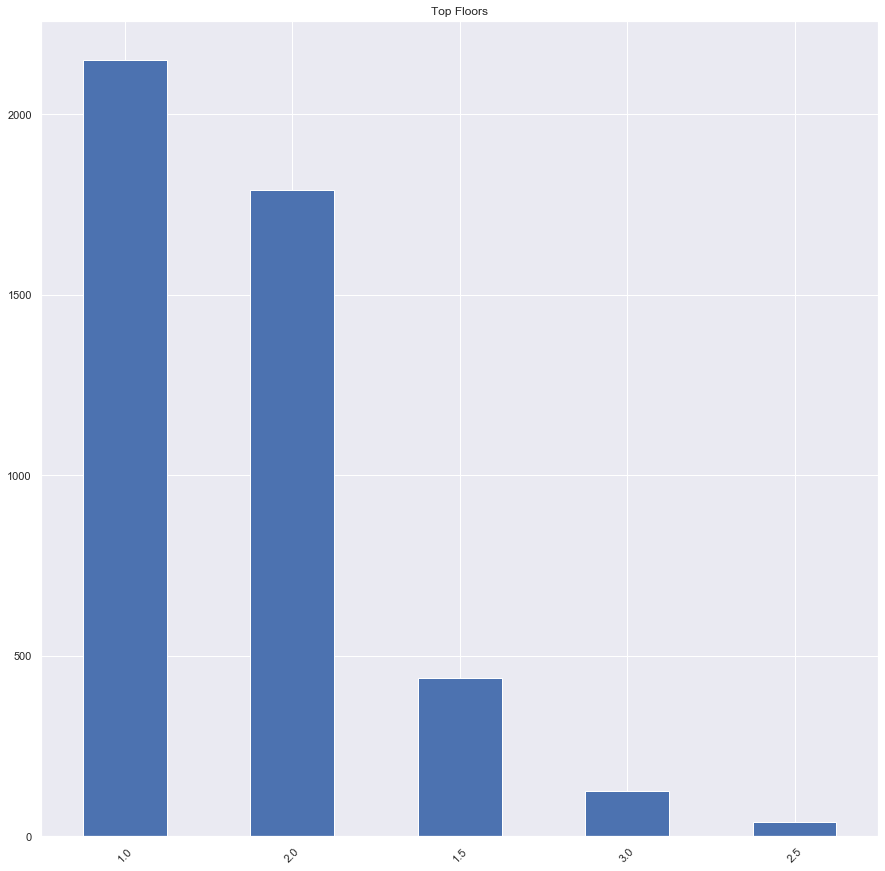

In [155]:
sns.set(rc={'figure.figsize':(15,15)})
viz_1=top_floor.plot(kind='bar')
viz_1.set_title('Top Floors')
viz_1.set_xticklabels(viz_1.get_xticklabels(), rotation=45)

berdasarkan grafik diatas, dapat dilihat bahwa rumah 1 lantai populer dengan total 2174, dan diikuti 2 lantai dengan 1811 penjualan

Text(0.5, 1.0, 'Percentage Floor')

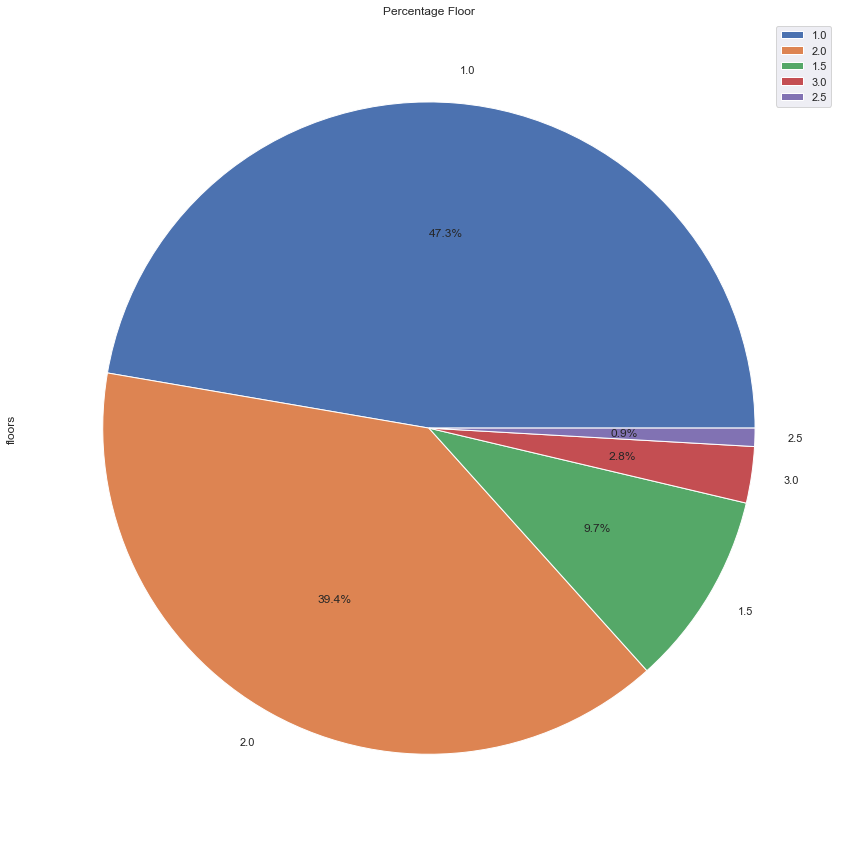

In [156]:
sns.set(rc={'figure.figsize':(15,15)})
viz_1=top_floor.plot(kind='pie',autopct='%1.1f%%',legend=True)
viz_1.set_title('Percentage Floor')

persentase nya pun dari 4600 data, rumah dengan 1 lantai mendominasi di 47.3%

In [157]:
house.pivot_table(index='floors', values='price', aggfunc=['sum', 'min', 'max', 'median', 'mean']).head(10)

,sum,min,max,median,mean
,price,price,price,price,price
floors,,,,,
1.0,9.941239e+08,7800.0,26590000.0,395000.0,462168.231569
1.5,2.569396e+08,132500.0,2453500.0,536000.0,585283.733253
2.0,1.172206e+09,84350.0,7062500.0,556500.0,654863.465783
2.5,4.033840e+07,195000.0,3200000.0,831500.0,983863.390244
3.0,7.246817e+07,288790.0,3100000.0,480000.0,570615.521435
3.5,5.635000e+05,563500.0,563500.0,563500.0,563500.000000


In [158]:
house5.pivot_table(index='floors', values='price', aggfunc=['sum', 'min', 'max', 'median', 'mean']).head(10)

,sum,min,max,median,mean
,price,price,price,price,price
floors,,,,,
1.0,3.870434e+08,7800.000000,2400000.0,389000.0,4.459025e+05
1.5,1.035648e+08,135333.333333,2453500.0,538000.0,6.056423e+05
2.0,3.982311e+08,134000.000000,3710000.0,541250.0,6.321129e+05
2.5,2.131930e+07,195000.000000,3200000.0,842500.0,1.015205e+06
3.0,3.364015e+07,305000.000000,3100000.0,443725.0,5.800025e+05


In [159]:
house6.pivot_table(index='floors', values='price', aggfunc=['sum', 'min', 'max', 'median', 'mean']).head(10)

,sum,min,max,median,mean
,price,price,price,price,price
floors,,,,,
1.0,4.527703e+08,100000.0,12899000.0,395000.0,449622.968034
1.5,1.187141e+08,132500.0,2250000.0,527000.0,576282.200745
2.0,5.743380e+08,84350.0,7062500.0,563000.0,660158.666377
2.5,1.637750e+07,400000.0,1990000.0,831500.0,963382.352941
3.0,2.886851e+07,288790.0,1712500.0,487500.0,555163.732906
3.5,5.635000e+05,563500.0,563500.0,563500.0,563500.000000


In [160]:
house7.pivot_table(index='floors', values='price', aggfunc=['sum', 'min', 'max', 'median', 'mean']).head(10)

,sum,min,max,median,mean
,price,price,price,price,price
floors,,,,,
1.0,1.543102e+08,100000.0,2.659000e+07,401750.0,559094.798931
1.5,3.466059e+07,150000.0,1.565000e+06,546900.0,559041.763264
2.0,1.996364e+08,175000.0,2.680000e+06,563000.0,688401.520145
2.5,2.641600e+06,711600.0,1.198000e+06,732000.0,880533.333333
3.0,9.959511e+06,337000.0,1.288333e+06,510000.0,585853.594771


In [161]:
top.pivot_table(index=['city'], values='floors', aggfunc=['mean', 'median','count'])

,mean,median,count
,floors,floors,floors
city,,,
Auburn,1.451429,1.0,175
Bellevue,1.395018,1.0,281
Federal Way,1.344828,1.0,145
Issaquah,1.798387,2.0,186
Kent,1.456522,1.0,184
Kirkland,1.459893,1.0,187
Redmond,1.561966,2.0,234
Renton,1.475945,1.0,291


## Berdasarkan data dari top city, dominasi rumah berlantai 1 masih terlihat mendominasi
https://nchh.org/resources/policy/substandard-housing/

## SQFT LIVING

In [162]:
top_sqftliving=house.sqft_living.value_counts().head(20)
top_sqftliving

1720    32
1940    32
1660    31
1840    31
2000    29
1410    29
1200    28
1480    28
1150    27
1890    27
1800    27
1700    27
1640    26
1590    26
1900    26
1980    26
1240    26
1680    26
1010    26
2550    26
Name: sqft_living, dtype: int64

In [163]:
print("luas bangunan terbesar adalah {}m2 dan terkecil adalah {}m2.".format(house['sqft_living'].max(),house['sqft_living'].min()))

luas bangunan terbesar adalah 13540m2 dan terkecil adalah 370m2.


[Text(0, 0, '1720'),
 Text(0, 0, '1940'),
 Text(0, 0, '1660'),
 Text(0, 0, '1840'),
 Text(0, 0, '2000'),
 Text(0, 0, '1410'),
 Text(0, 0, '1200'),
 Text(0, 0, '1480'),
 Text(0, 0, '1150'),
 Text(0, 0, '1890'),
 Text(0, 0, '1800'),
 Text(0, 0, '1700'),
 Text(0, 0, '1640'),
 Text(0, 0, '1590'),
 Text(0, 0, '1900'),
 Text(0, 0, '1980'),
 Text(0, 0, '1240'),
 Text(0, 0, '1680'),
 Text(0, 0, '1010'),
 Text(0, 0, '2550')]

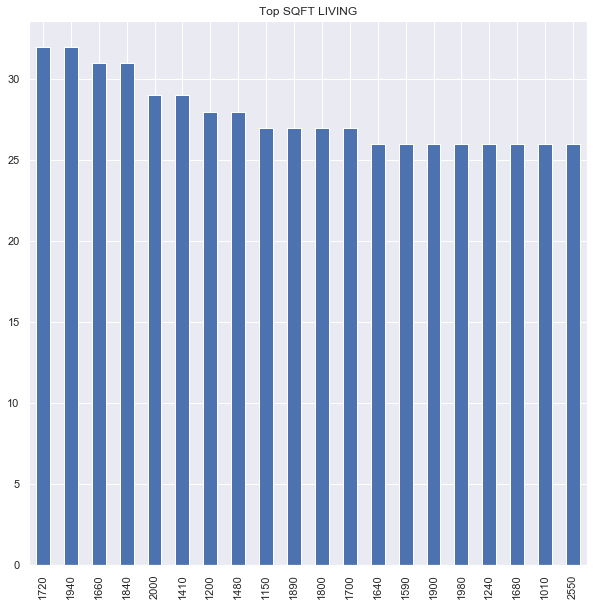

In [164]:
sns.set(rc={'figure.figsize':(10,10)})
viz_1=top_sqftliving.plot(kind='bar')
viz_1.set_title('Top SQFT LIVING')
viz_1.set_xticklabels(viz_1.get_xticklabels(), rotation=90)

Berdasarkan grafik diatas, kita dapat melihat bahwa rumah di USA memilki luas rata2 di kisaran antara 1000 - 2000an m2. Hal ini bisa dijadikan acuan untuk pebisnis untuk membuat rumah di sekitaran angka tersebut

Text(0.5, 1.0, 'Percentage Floor')

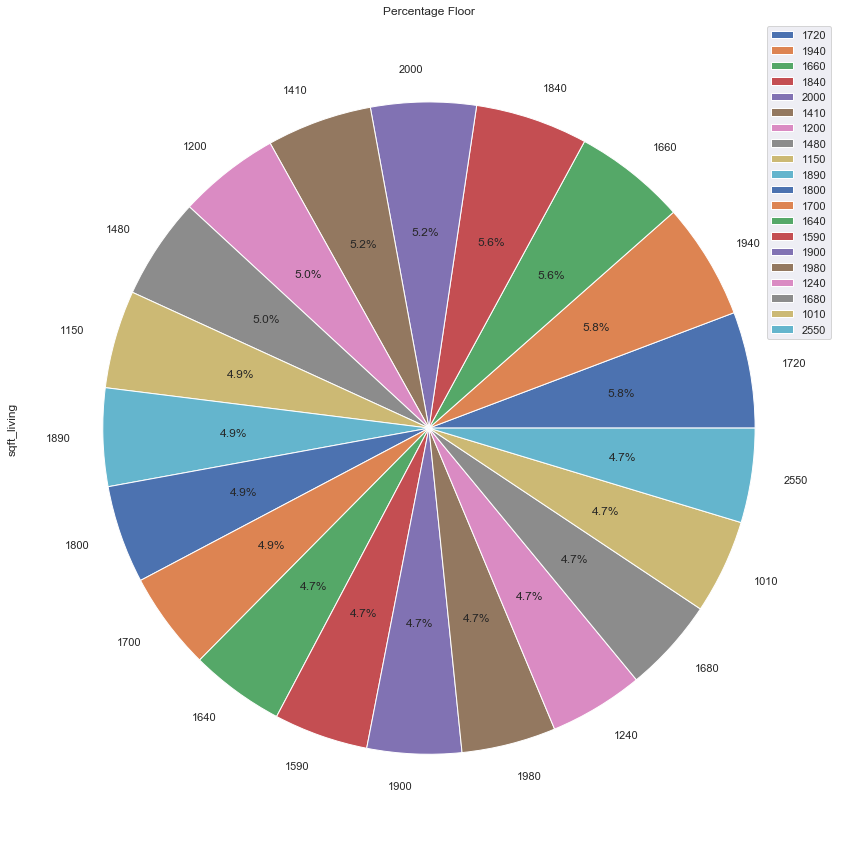

In [165]:
sns.set(rc={'figure.figsize':(15,15)})
viz_1=top_sqftliving.plot(kind='pie',autopct='%1.1f%%',legend=True)
viz_1.set_title('Percentage Floor')

In [166]:
top.pivot_table(index=['city'], values='sqft_living', aggfunc=['mean', 'median','count'])

,mean,median,count
,sqft_living,sqft_living,sqft_living
city,,,
Auburn,2019.920000,1900.0,175
Bellevue,2673.113879,2450.0,281
Federal Way,2067.027586,1920.0,145
Issaquah,2453.354839,2270.0,186
Kent,1980.190217,1940.0,184
Kirkland,2259.481283,2020.0,187
Redmond,2481.854701,2377.5,234
Renton,2108.230241,2060.0,291


Hal ini pun sebanding dengan top city dimana memilki kisaran di angka tersebut. 
https://nchh.org/resources/policy/substandard-housing/

## SQFT LOT

In [167]:
top_lot=house.sqft_lot.value_counts().head(20)
top_lot

5000    80
6000    64
4000    54
7200    49
4800    29
4500    25
9600    25
3000    23
5500    23
7500    22
3600    21
8100    20
4080    17
7700    17
7000    16
8400    16
5750    15
8000    15
9000    15
5100    14
Name: sqft_lot, dtype: int64

In [168]:
print("luas terbesar adalah {}m2 dan terkecil adalah {}m2.".format(house['sqft_lot'].max(),house['sqft_lot'].min()))

luas terbesar adalah 1074218m2 dan terkecil adalah 638m2.


[Text(0, 0, '5000'),
 Text(0, 0, '6000'),
 Text(0, 0, '4000'),
 Text(0, 0, '7200'),
 Text(0, 0, '4800'),
 Text(0, 0, '4500'),
 Text(0, 0, '9600'),
 Text(0, 0, '3000'),
 Text(0, 0, '5500'),
 Text(0, 0, '7500'),
 Text(0, 0, '3600'),
 Text(0, 0, '8100'),
 Text(0, 0, '4080'),
 Text(0, 0, '7700'),
 Text(0, 0, '7000'),
 Text(0, 0, '8400'),
 Text(0, 0, '5750'),
 Text(0, 0, '8000'),
 Text(0, 0, '9000'),
 Text(0, 0, '5100')]

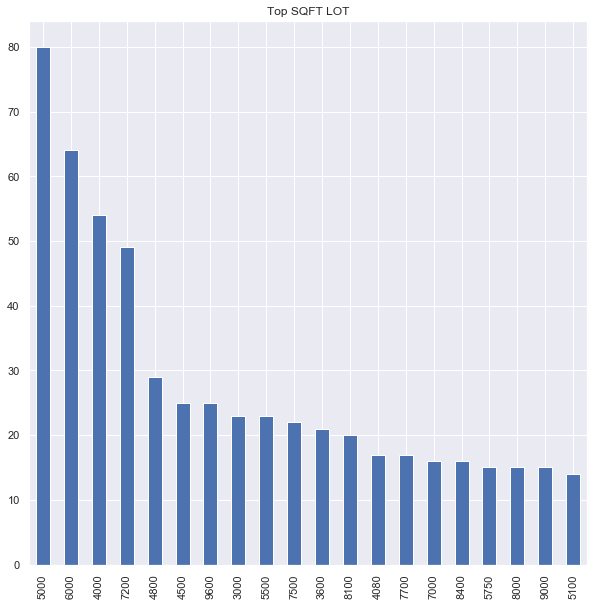

In [169]:
sns.set(rc={'figure.figsize':(10,10)})
viz_1=top_lot.plot(kind='bar')
viz_1.set_title('Top SQFT LOT')
viz_1.set_xticklabels(viz_1.get_xticklabels(), rotation=90)

Text(0.5, 1.0, 'Percentage Floor')

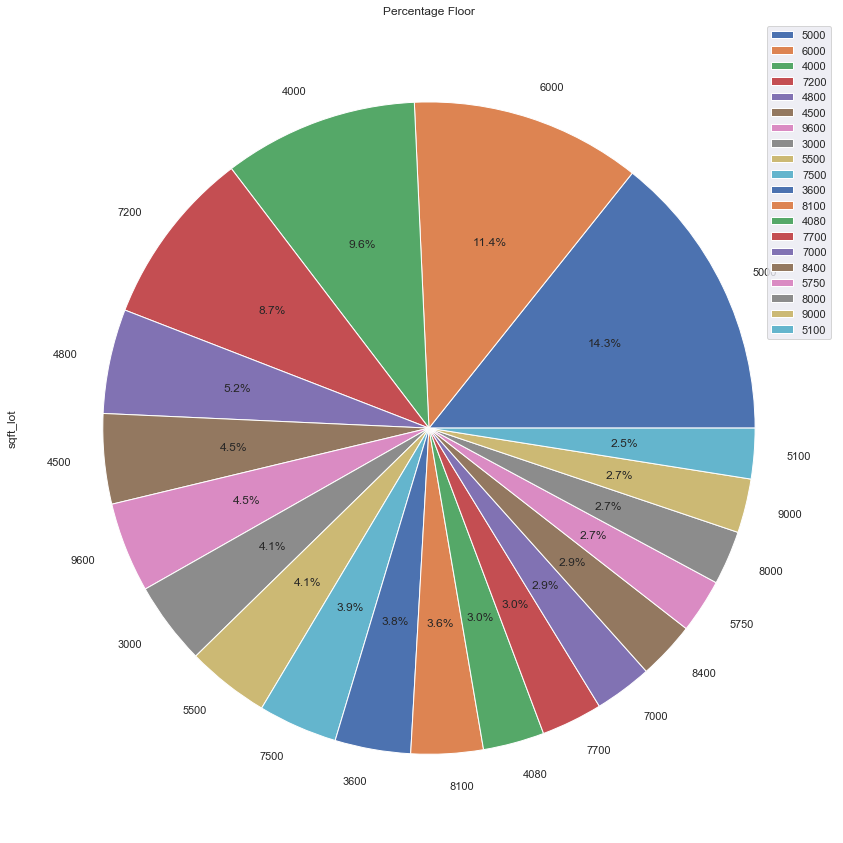

In [170]:
sns.set(rc={'figure.figsize':(15,15)})
viz_1=top_lot.plot(kind='pie',autopct='%1.1f%%',legend=True)
viz_1.set_title('Percentage Floor')

In [171]:
top.pivot_table(index=['city'], values='sqft_lot', aggfunc=['mean', 'median','count'])

,mean,median,count
,sqft_lot,sqft_lot,sqft_lot
city,,,
Auburn,25075.788571,8470.0,175
Bellevue,13781.498221,10279.0,281
Federal Way,11521.668966,8750.0,145
Issaquah,24660.145161,7203.0,186
Kent,15115.005435,8312.0,184
Kirkland,10317.705882,8519.0,187
Redmond,23918.790598,9582.5,234
Renton,14569.738832,7838.0,291


Berdasarkan grafik data bar diatas, dapat disimpulkan bahwa luas terbanyak ada di 5000m2 dan bila di sandingkan dengan top city, Seattle paling mendeketasi yang mana merupakan nomor 1 di USA

# KESIMPULAN DAN SARAN

- perusahaan ingin mencari area kota ter profit untuk berbisnis properti yang mana penjualan tersebut diurutkan berdasarkan 10 kota terbaik dalam hal penjualan di 3 bulan. 
# Berdasarkan data tentang penjualan per tiga bulan, didapati 10 kota ter profit yaitu Seattle,Renton,Bellevue,Redmond,Kent,Auburn,Kirkland,Issaquah,Sammamish,dan Federal Way yang mampu mengumpulkan 1338 total penjualan di bulan 5, 1607 di bulan 6 dan 500 dibulan ke 7. Dengan urutan pertama Seattle yang memiliki penjualan total 1573 penjualan, dengan persentase penjualan 45.7 % di antara 9 top city lainnya dan penjualan tertinggi terdapat di bulan Juni dengan 725 penjualan dan yang terbesar penjualan terletak di tanggal 20 Mei dengan penjualan terbanyak 51 rumah.
- perusahaan ingin mencari spesifikasi properti yang profit untuk berbisnis di USA dilihat dari data historis bulan Mei ke 10 Juli. Hal ini bertujuan untuk meningkatkan penjualan di area kota yang telah diselidiki sebelumnya.
# Berdasarkan analisa terkait spesifikasi properti, ada beberapa yang dianggap sangat potensial, yaitu lokasi,jumlah lantai,jumlah kamar tidur,jumlah kamar mandi, luas bangunan,dan luas tanah. Dengan kesimpulan sebagai berikut lokasi Seattle, jumlah lantai 1, jumlah kamar tidur 3, jumlah kamar mandi 2.5, luas bangunan antara 1000-2000m2 dan luas tanah kisaran 5000m2-7000m2

# PEMILIK BISNIS PROPERTI HARUS BERINVESTASI DI SEATTLE SEBAGAI AREA YANG POTENSIAL. SPESIFIKASI YANG DIBUTUHKAN DI US ADALAH 1 LANTAI, 3 KAMAR TIDUR, 2.5 KAMAR MANDI (2 kamar mandi dengan bathtub,shower,toilet,wastafel dan 0.5 kamar mandi hanya toilet dan wastafel saja,luas bangunan 1000-2000m2 dan luas tanah 5000-7000m2)

REFERENSI

- https://www.suara.com/bisnis/2014/05/23/231311/penjualan-rumah-di-amerika-meningkat#! 
- http://www.urbancondospaces.com/10-year-chart-seattle-real-estate-is-mind-blowing/ 
- https://www.huduser.gov/portal/publications/pdf/SeattleWA-comp-17.pdf 
- http://www.hakc.org/sites/www/Uploads/files/Downloads/HQS_Part2_Inspections.pdf
- https://nchh.org/resources/policy/substandard-housing/

In [172]:
harga = house[(house.city == 'Seattle')&(house.bedrooms == 3.0)&(house.bathrooms == 2.5)&(house.sqft_living >= 1000)&(house.sqft_living <= 2000)&(house.sqft_lot >= 5000)&(house.sqft_lot <= 7000)]

In [173]:
harga

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,city,month,day
625,2014-05-13,330000.0,3.0,2.5,1450,5008,1.0,0,0,3,840,610,Seattle,5,13
786,2014-05-16,408200.0,3.0,2.5,1800,5761,2.0,0,0,4,1800,0,Seattle,5,16
2241,2014-06-10,310000.0,3.0,2.5,1780,6771,1.0,0,0,3,1230,550,Seattle,6,10
3210,2014-06-24,485000.0,3.0,2.5,1500,5412,1.0,0,0,5,900,600,Seattle,6,24


In [174]:
harga['price'].mean()

383300.0

# Dataset Splitting

In [19]:
# house.drop(['date'],axis=1,inplace=True)
house.drop(['street','city','statezip','country'],axis=1,inplace=True)

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [21]:
X = house.drop(columns='price')
Y = house.price

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size =.75,random_state=42)

# ML Modelling

In [24]:
LR =LinearRegression()
LR.fit(X_train,Y_train)
y_predLR=LR.predict(X_test)
print ("R2 SCORE GIO : ", r2_score(Y_test,y_predLR))
print("MAE SCORE GIO : ",mean_absolute_error(Y_test,y_predLR))
print("MSE SCORE GIO : ",mean_squared_error(Y_test,y_predLR))
print("RMSE SCORE GIO : ",np.sqrt(mean_squared_error(Y_test,y_predLR)))

R2 SCORE GIO :  0.41782228990816495
MAE SCORE GIO :  145077.83823293273
MSE SCORE GIO :  39307226142.18308
RMSE SCORE GIO :  198260.50071101676


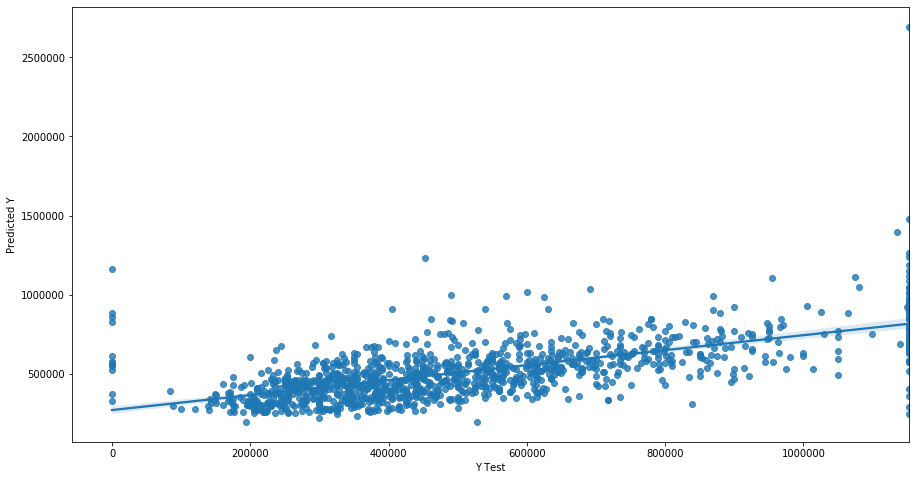

In [25]:
plt.figure(figsize=(15,8))
sns.regplot(Y_test,y_predLR,fit_reg =True)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

In [26]:
forest = RandomForestRegressor()
forest = forest.fit(X_train, Y_train)
y_test_predf = forest.predict(X_test)
print('R2 SCORE GIO : ',(r2_score(Y_test, y_test_predf)))
print("MAE SCORE GIO : ",mean_absolute_error(Y_test,y_test_predf))
print("MSE SCORE GIO : ",mean_squared_error(Y_test,y_test_predf))
print("RMSE SCORE GIO : ",(np.sqrt(mean_squared_error(Y_test,y_test_predf))))

R2 SCORE GIO :  0.43025578772015605
MAE SCORE GIO :  142477.324299694
MSE SCORE GIO :  38467746543.836426
RMSE SCORE GIO :  196131.9620659428
